# This notebook compares the V15 and V20 prediction errors for different bitstrings

#### Load the data

In [3]:
import pandas as pd
df = pd.read_pickle('tmp_data/clean_yearly_data.pkl')


#### Create a plotting function

In [4]:
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import matplotlib.colors as mc
import matplotlib.colorbar as cb 


def RobinsonPlot(df,z,vmin,vmax,cmap,markersize,savefig,ncircles):


    #Setup plotting env
    fig = plt.figure(figsize=[30,20])
    ax = plt.subplot(projection=ccrs.Robinson(central_longitude=0))
    cax = fig.add_axes([0.32, 0.11, 0.4, 0.0125])

    #Get data
    x = df['latitude_ERA']
    y = df['longitude_ERA']
    z1 = df[z]
    
    
    #Normalise
    norm = mc.Normalize(vmin=vmin, vmax=vmax)

    #Colorbar
    cb1 = cb.ColorbarBase(cax, cmap=cmap,
                               norm=norm,
                               orientation='horizontal'
                               )
    #Scatter points
    sc = ax.scatter(y,x,transform=ccrs.PlateCarree(),
                    s=markersize,
                    c=cmap(norm(z1)),
                    linewidths=1, 
                    alpha=.7)


    #Latitude cutoffs
    ax.plot([-180,180],[70,70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')
    ax.plot([-180,180],[-70,-70],transform=ccrs.PlateCarree(),c='0.5', linestyle='--')


    
    #Formatting
    cax.tick_params(labelsize=30)
    cax.set_xlabel(r'$\delta$K',fontsize=34)
    

    ax.coastlines()
    ax.set_aspect('auto') #Force projection aspect ratio
    
    ax.scatter(180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.
    ax.scatter(-180,0,c='1',transform=ccrs.PlateCarree(),s=100,alpha=0.1) #invisible point to set plot limits. Hacky, but works OK.

    
    
    
    #Extra circles
    row = df.sort_values(by=['delta'],ascending=False).iloc[0:ncircles]
    xsel = row['latitude_ERA']
    ysel = row['longitude_ERA']
    
    sc_extra = ax.scatter(ysel,xsel,transform=ccrs.PlateCarree(),
                          s=200, facecolors='none', edgecolors='C2',lw=2
                          )

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    
    
    
    

In [5]:
df.columns

Index(['latitude_ERA', 'longitude_ERA', 'MODIS_LST', 'V15_prediction',
       'V20_prediction', 'V20X_prediction', 'V15X_prediction', 'V15_error',
       'V20_error', 'V20X_error', 'V15X_error', 'delta', 'deltaX', 'deltaX15',
       'latitude_join', 'longitude_join', 'latitude_ERA_y', 'longitude_ERA_y',
       'V15_clFr', 'V15_cvhFr', 'V15_cvlFr', 'V15_dl', 'V15_oceanFr',
       'V15_si10Fr', 'V15_z', 'V20_clFr', 'V20_cvhFr', 'V20_cvlFr', 'V20_dl',
       'V20_oceanFr', 'V20_si10Fr', 'V20_z', 'changeAbs_V20V15_clFr',
       'changeAbs_V20V15_cvhFr', 'changeAbs_V20V15_cvlFr',
       'changeAbs_V20V15_oceanFr', 'changeAbs_V20V15_si10Fr',
       'changeAbs_V20V15_dl', 'changeAbs_V20V15_z',
       'clFr_change_is_significant', 'cvhFr_change_is_significant',
       'cvlFr_change_is_significant', 'oceanFr_change_is_significant',
       'si10Fr_change_is_significant', 'dl_change_is_significant',
       'z_change_is_significant', 'bitstring'],
      dtype='object')

# 1. Lakes

In [6]:
df_lake = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not si10Fr_change_is_significant')
n = 7
#RobinsonPlot(df_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig='figs/lake_haver.png',ncircles=n)
RobinsonPlot(df_lake,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)

display(df_lake.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake.delta.mean())
display(len(df_lake)) #''

latitude_ERA  longitude_ERA     delta
38367      -2.388758        36.0000  5.396403
9220      -29.367672       139.6875  1.786335
101073     41.170945      -113.4000  1.784719
84857      31.615914        61.1200  1.663431
38705      -2.107728        36.0000  1.659139
71526      24.028095        69.0000  1.604342
70081      23.185004        30.9000  1.562348

-0.45003444

1631

latitude_ERA  longitude_ERA     delta
101073     41.170945        -113.40  1.784719
84857      31.615914          61.12  1.663431
71526      24.028095          69.00  1.604342
70081      23.185004          30.90  1.562348
100570     40.889915        -113.76  1.491879

-1.1247547

546

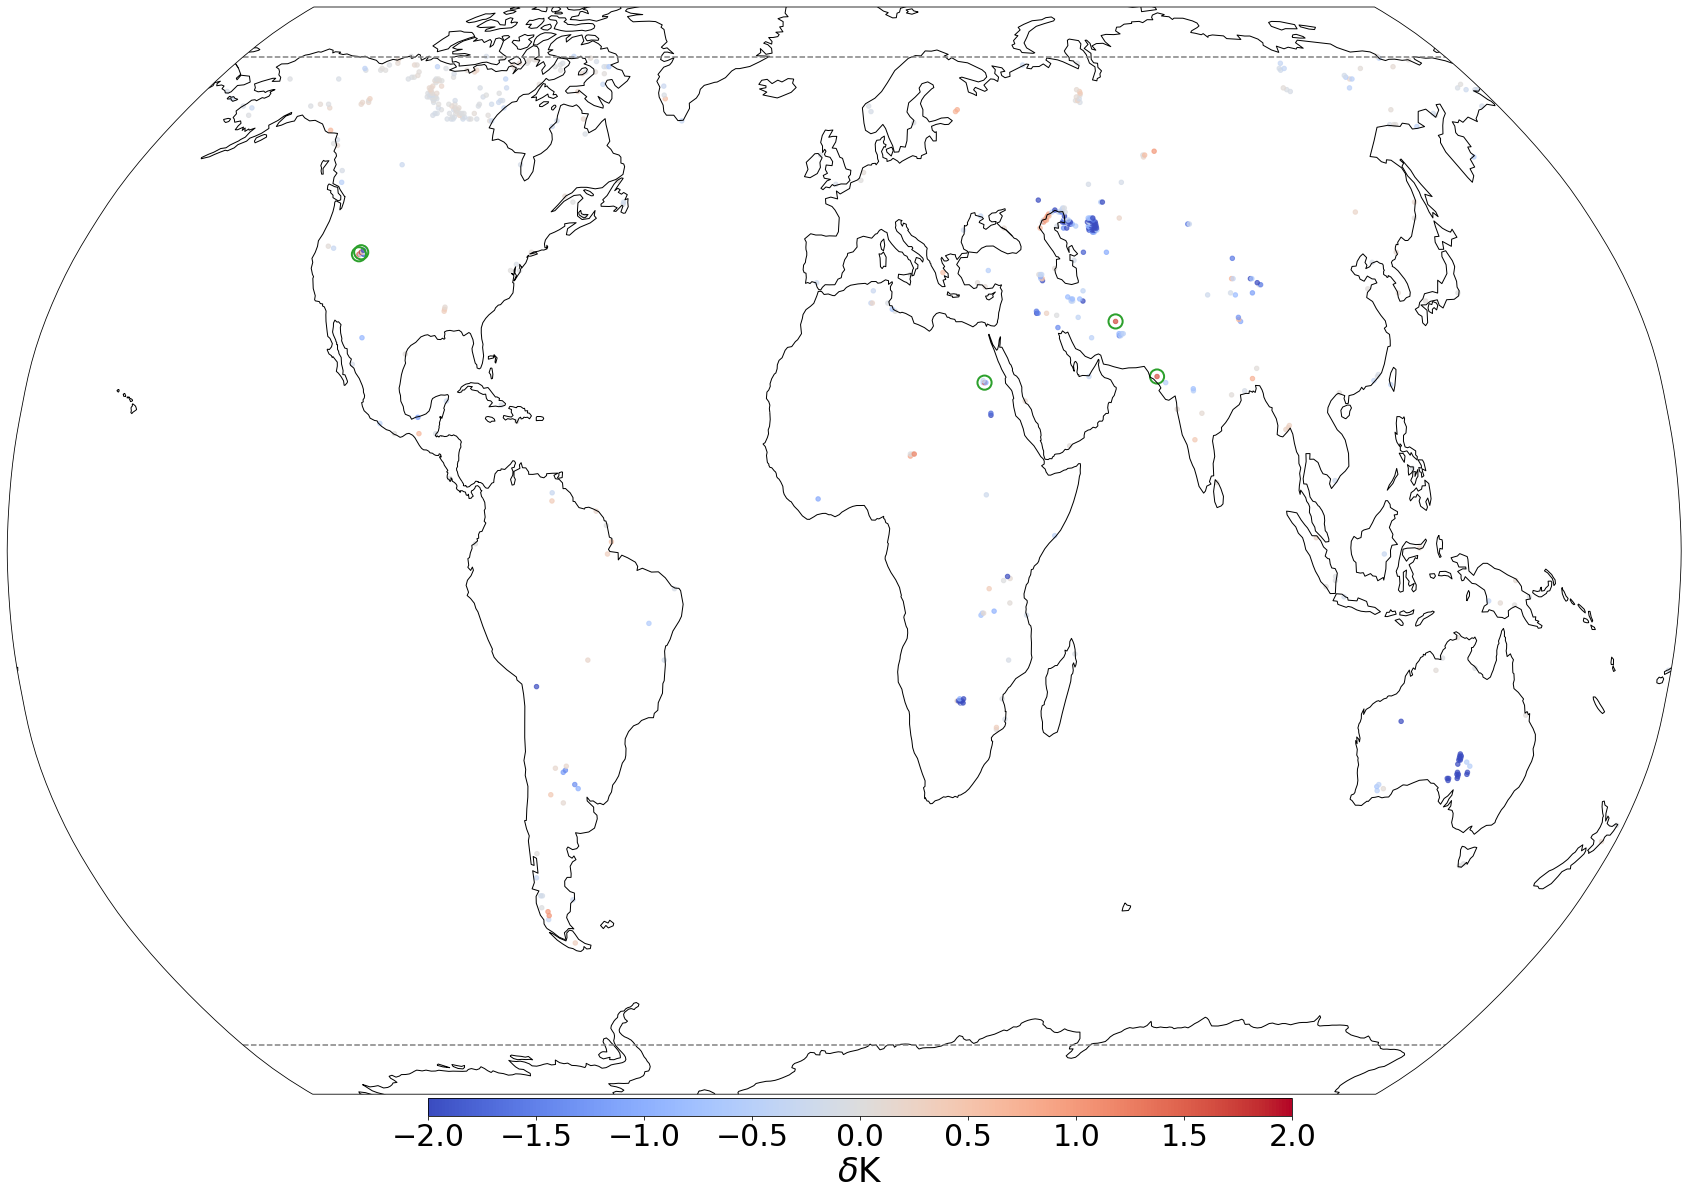

In [7]:
df_lake_ground = df.query('clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant')
n = 5
RobinsonPlot(df_lake_ground,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake_ground.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_lake_ground.delta.mean())
display(len(df_lake_ground))

# 2. Vegetation

latitude_ERA  longitude_ERA     delta
30656      -8.852456     120.656250  4.530539
105108     43.419187      -4.125000  3.734607
86233      32.459005      34.880000  3.441413
54269      11.662760     102.937500  3.095105
3462      -42.576096     171.111111  2.250091

0.23525162

78

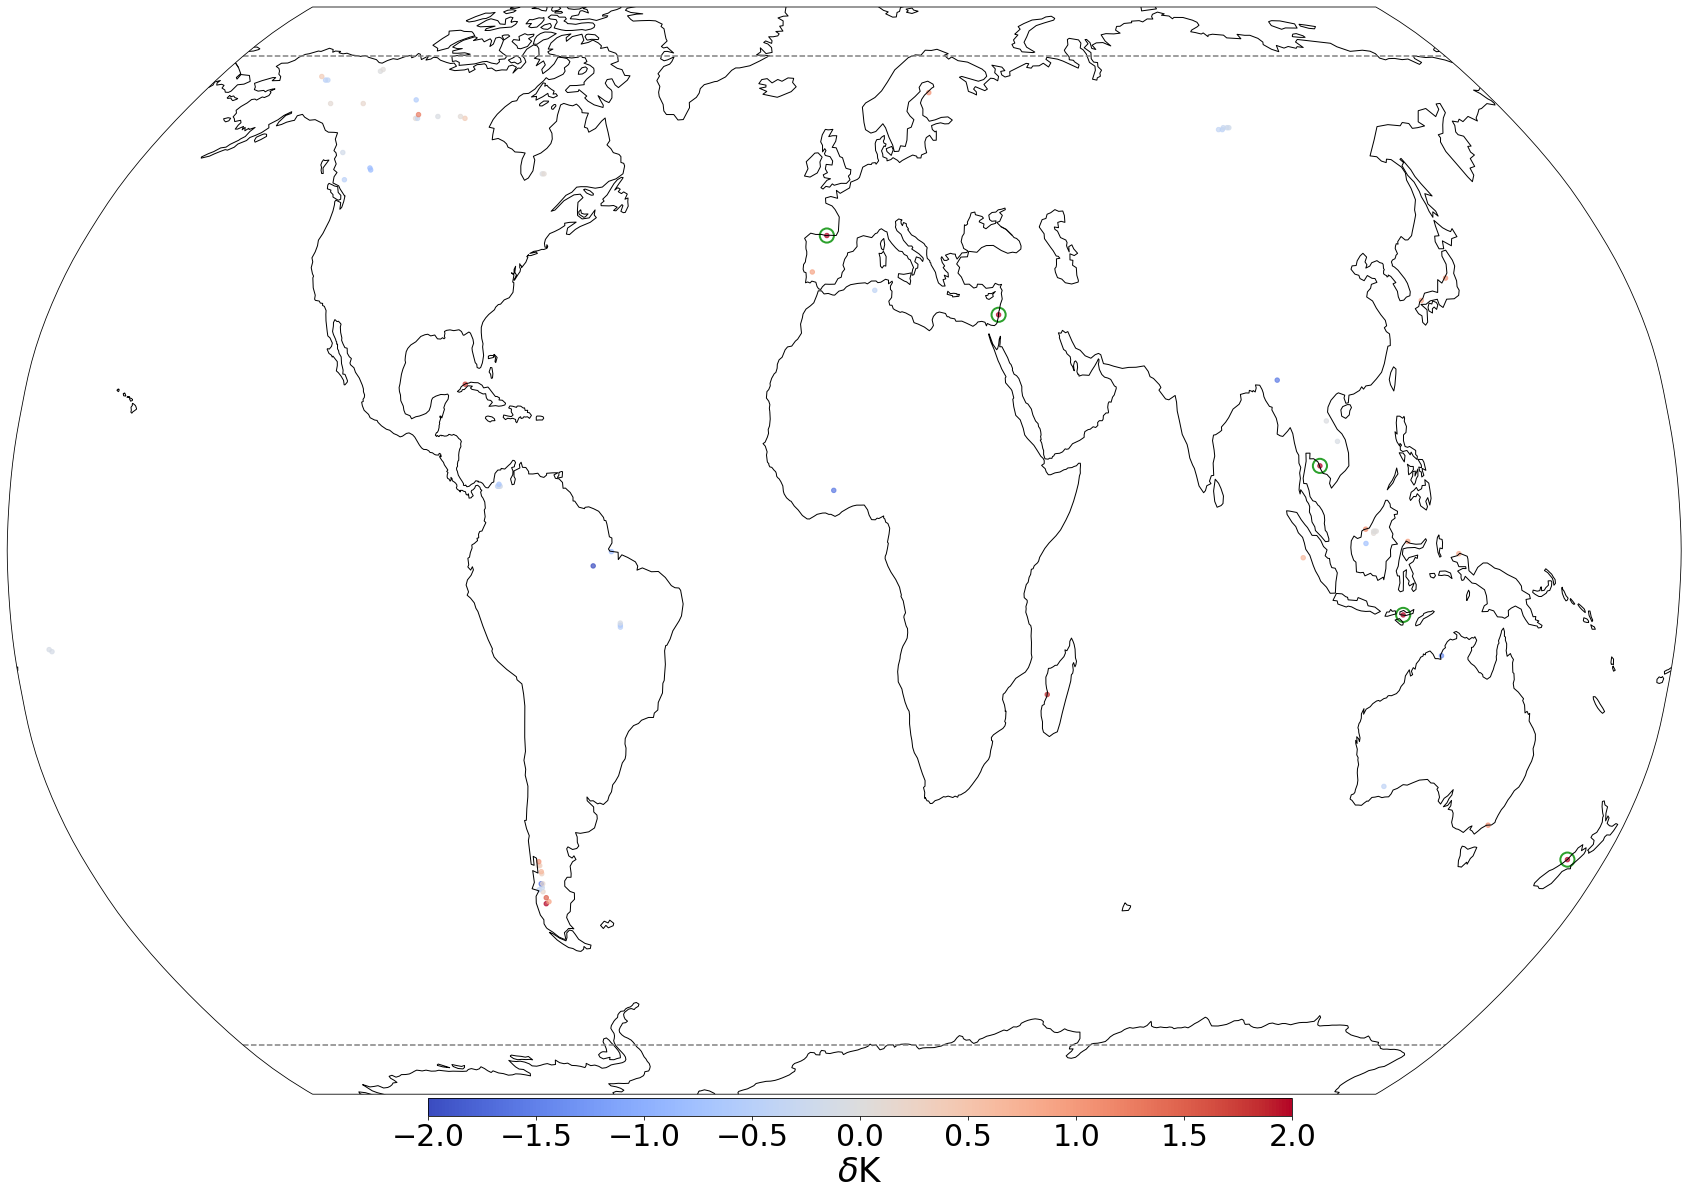

In [8]:
df_veg = df.query('cvhFr_change_is_significant & not cvlFr_change_is_significant')
n = 5
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_veg.delta.mean())
display(len(df_veg))

latitude_ERA  longitude_ERA     delta
30656      -8.852456     120.656250  4.530539
105108     43.419187      -4.125000  3.734607
86233      32.459005      34.880000  3.441413
54269      11.662760     102.937500  3.095105
3462      -42.576096     171.111111  2.250091

0.4946728

58

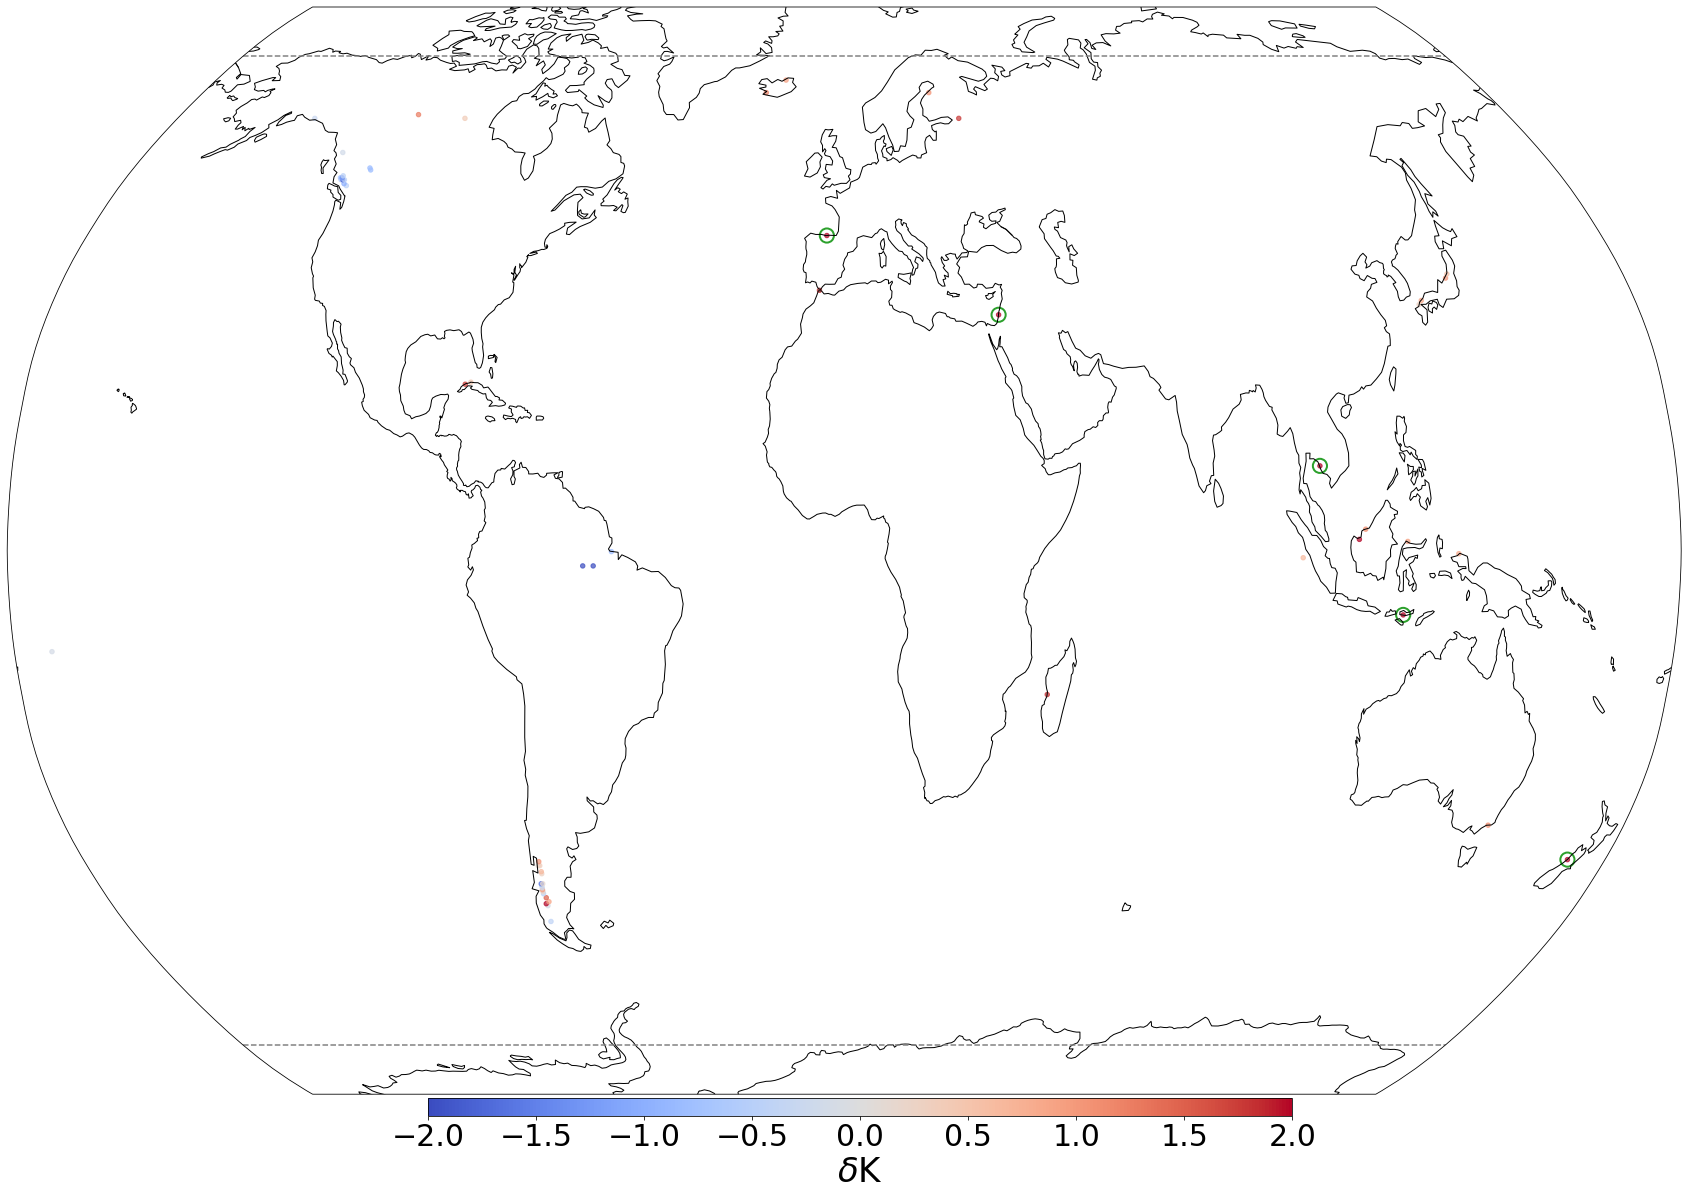

In [9]:
df_veg = df.query('cvhFr_change_is_significant & not clFr_change_is_significant')
n = 5
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_veg.delta.mean())
display(len(df_veg))

latitude_ERA  longitude_ERA     delta
38367      -2.388758         36.000  5.396403
28186     -11.100699        -77.625  4.944086
48577       6.885244        101.250  4.099982
71521      24.028095         67.500  3.835844
112020     47.072581         39.200  3.080651

-0.12223423

1689

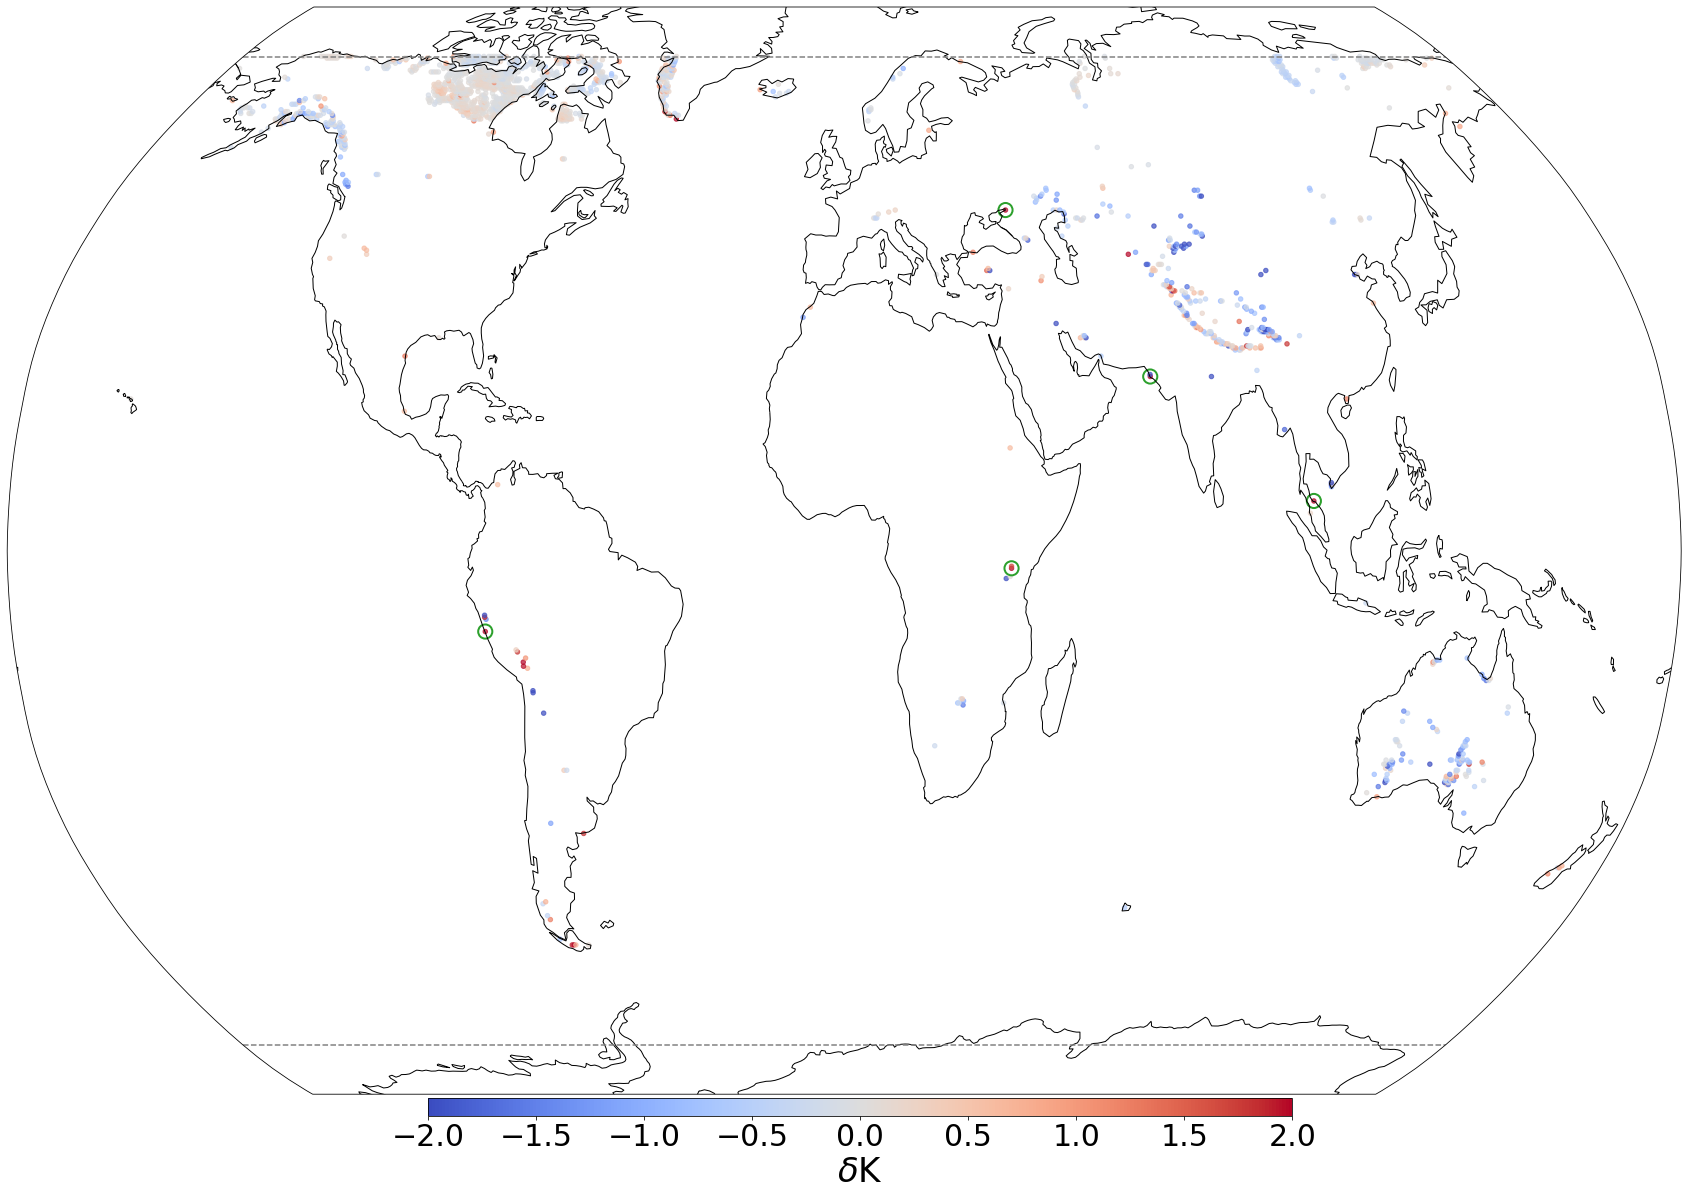

In [10]:
df_veg = df.query('cvlFr_change_is_significant & not cvhFr_change_is_significant')
n = 5
RobinsonPlot(df_veg,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_veg.delta.mean())
display(len(df_veg))

# 3. Glacier

latitude_ERA  longitude_ERA     delta
2328     -54.098337     -36.900000  3.715223
2174     -63.934391     -58.200000  3.533224
1903     -66.744690     109.333333  2.966166
2214     -61.967180     -57.937500  2.895869
6228     -33.021066     -70.080000  2.674545
2797     -47.634641     -72.400000  2.482121
2272     -54.660397     -69.375000  2.445374
6590     -32.459005     -70.080000  2.428473
92084     35.831369      75.333333  2.293386
2695     -48.758762     -73.200000  2.225029

-0.13505524

1057

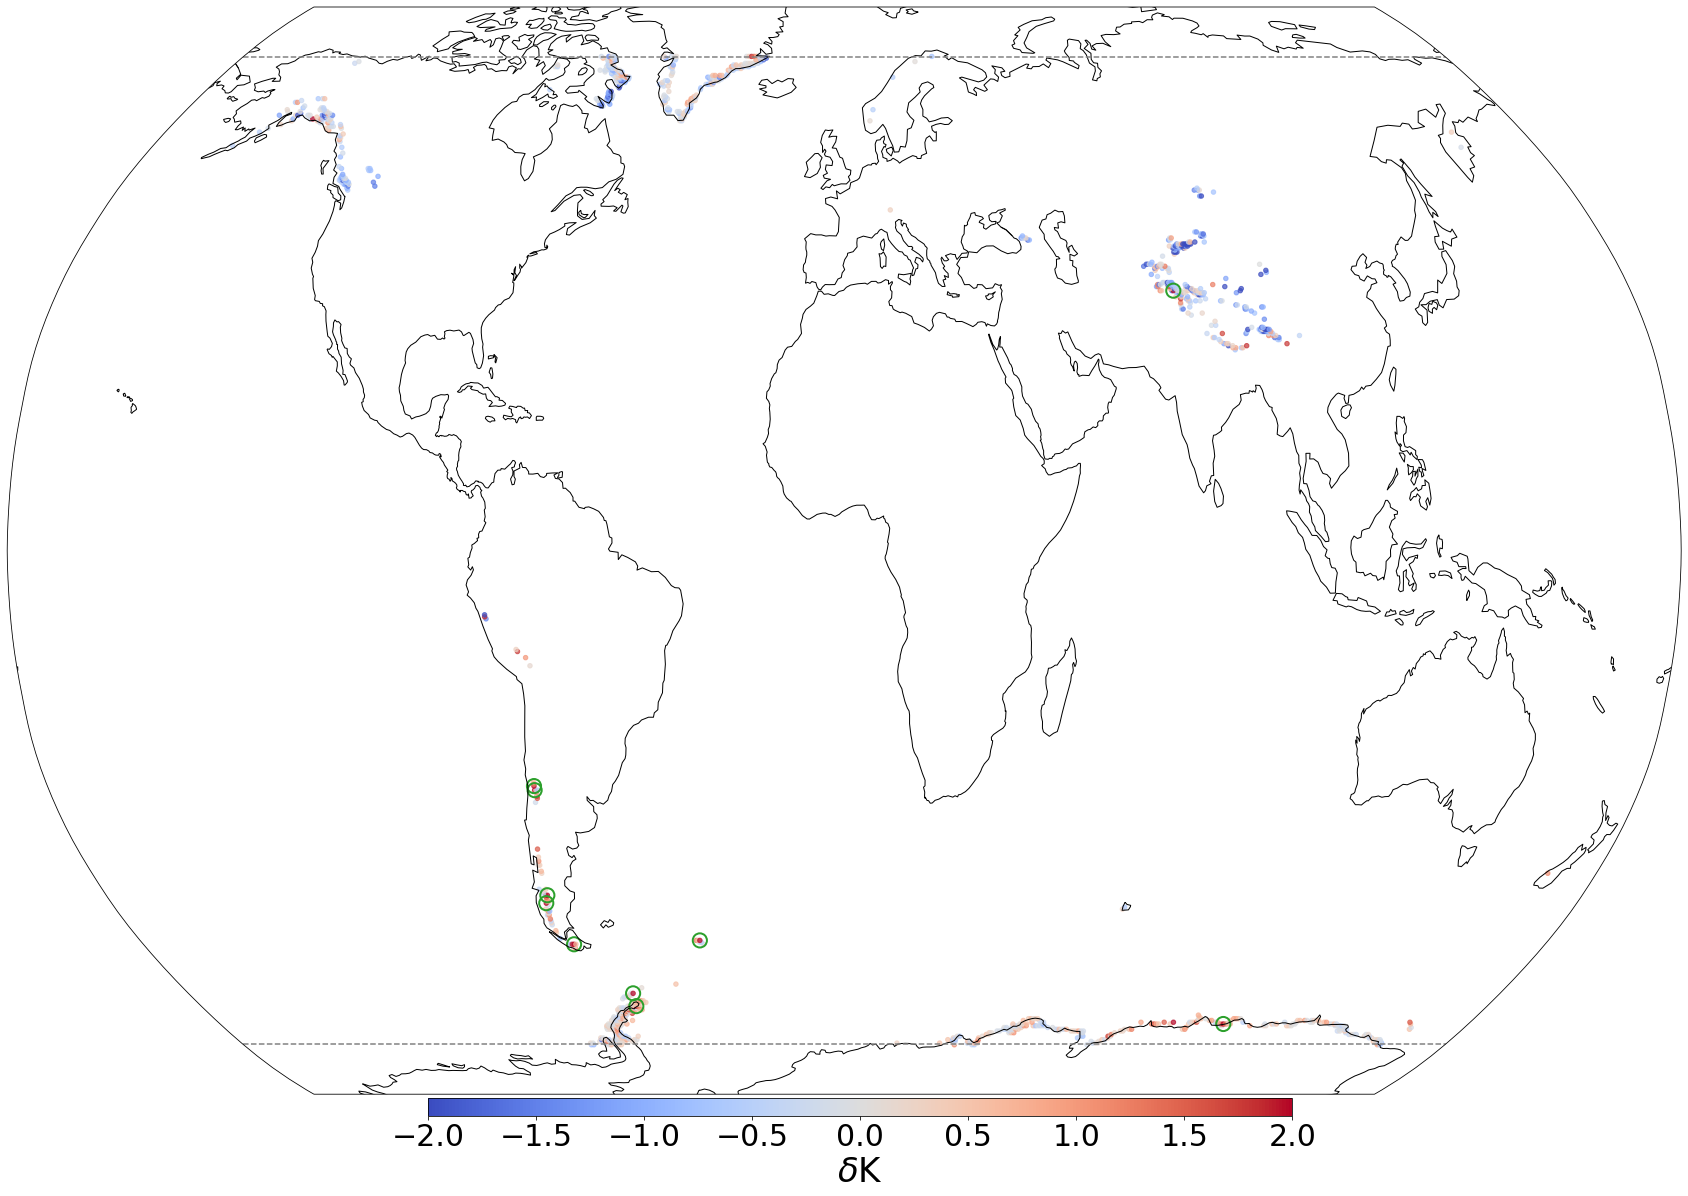

In [11]:
df_ice = df.query('si10Fr_change_is_significant')
n = 10
RobinsonPlot(df_ice,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
display(df_ice.delta.mean())
display(len(df_ice))

# 4. Deep dive

Let look at some particular points in each of the categories

## 4a. Lakes

In [12]:
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[0:7][['latitude_ERA','longitude_ERA','delta']])
display(df_lake.delta.mean())
display(len(df_lake))

latitude_ERA  longitude_ERA     delta
38367      -2.388758        36.0000  5.396403
9220      -29.367672       139.6875  1.786335
101073     41.170945      -113.4000  1.784719
84857      31.615914        61.1200  1.663431
38705      -2.107728        36.0000  1.659139
71526      24.028095        69.0000  1.604342
70081      23.185004        30.9000  1.562348

-0.45003444

1631

In [41]:
#0 = Lake natron, 
#1 = Australia
#2= SLC
#3=Afghan/Iran
#4 = Lake natron, northern edge
#5 = Northern India
#6 = Toska Lakes
i = 5
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[i])
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[i][['latitude_ERA']].to_numpy()[0])
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[i][['longitude_ERA']].to_numpy()[0])


latitude_ERA                      24.028095
longitude_ERA                          69.0
MODIS_LST                        313.741486
V15_prediction                   303.694489
V20_prediction                   302.030151
V20X_prediction                  303.199829
V15X_prediction                   314.55545
V15_error                         10.159698
V20_error                          11.76404
V20X_error                        10.755802
V15X_error                         4.342269
delta                              1.604342
deltaX                             0.596104
deltaX15                           -5.81743
latitude_join                        24.028
longitude_join                         69.0
latitude_ERA_y                    24.028095
longitude_ERA_y                        69.0
V15_clFr                            0.59056
V15_cvhFr                               0.0
V15_cvlFr                               0.0
V15_dl                             2.580078
V15_oceanFr                     

24.028095261448925

69.0

0.017366955

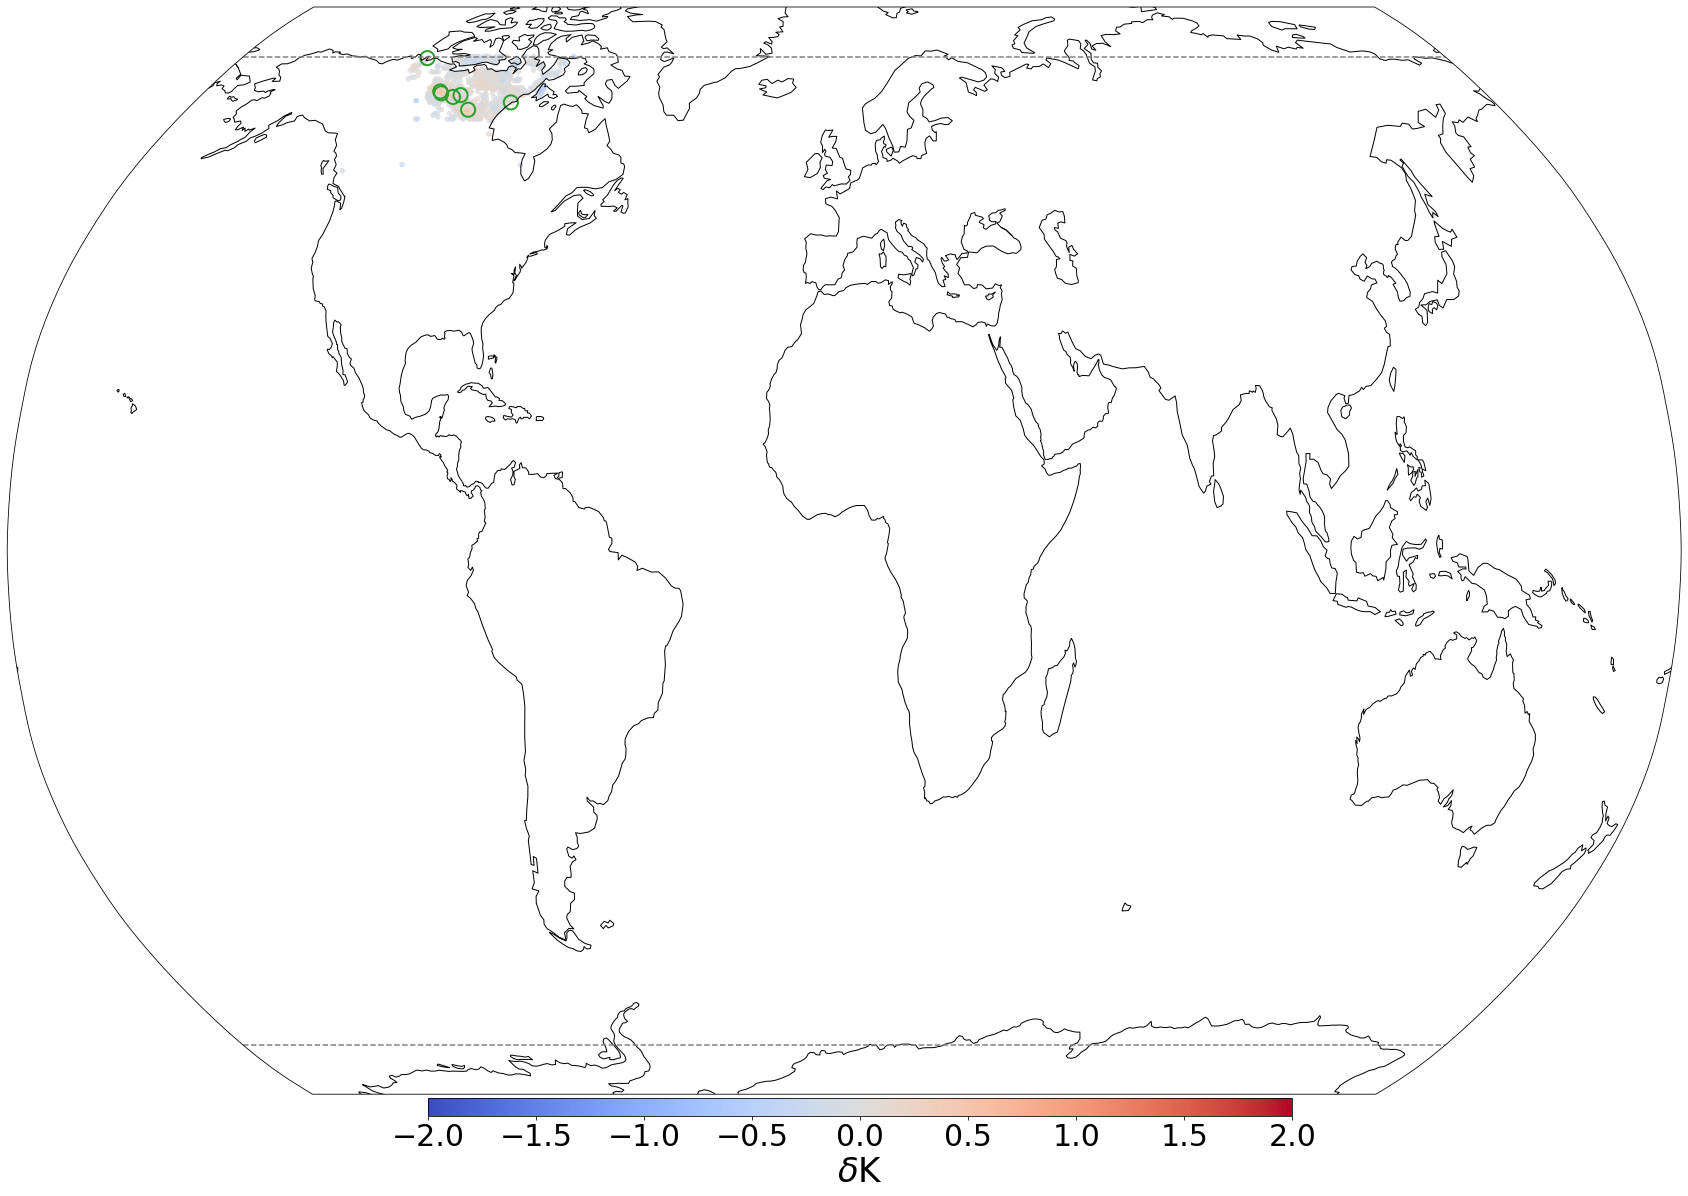

In [104]:
# Northern Canada - all points
df_lake_canada = df_lake.query('50.0 < latitude_ERA & -130 < longitude_ERA < -80')
RobinsonPlot(df_lake_canada,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake_canada.delta.mean())


0.12237371

latitude_ERA                       31.615914
longitude_ERA                          61.12
MODIS_LST                         312.860474
V15_prediction                    313.586182
V20_prediction                    317.005798
V20X_prediction                   314.404816
V15_error                           2.962719
V20_error                           4.626151
V20X_error                          2.923563
delta                               1.663431
deltaX                             -0.039156
latitude_join                         31.616
longitude_join                         61.12
latitude_ERA_y                     31.615914
longitude_ERA_y                    61.119999
V15_clFr                            0.112399
V15_cvhFr                                0.0
V15_cvlFr                           0.003856
V15_dl                                   8.0
V15_oceanFr                              0.0
V15_si10Fr                               0.0
V15_z                            5823.691406
V20_clFr  

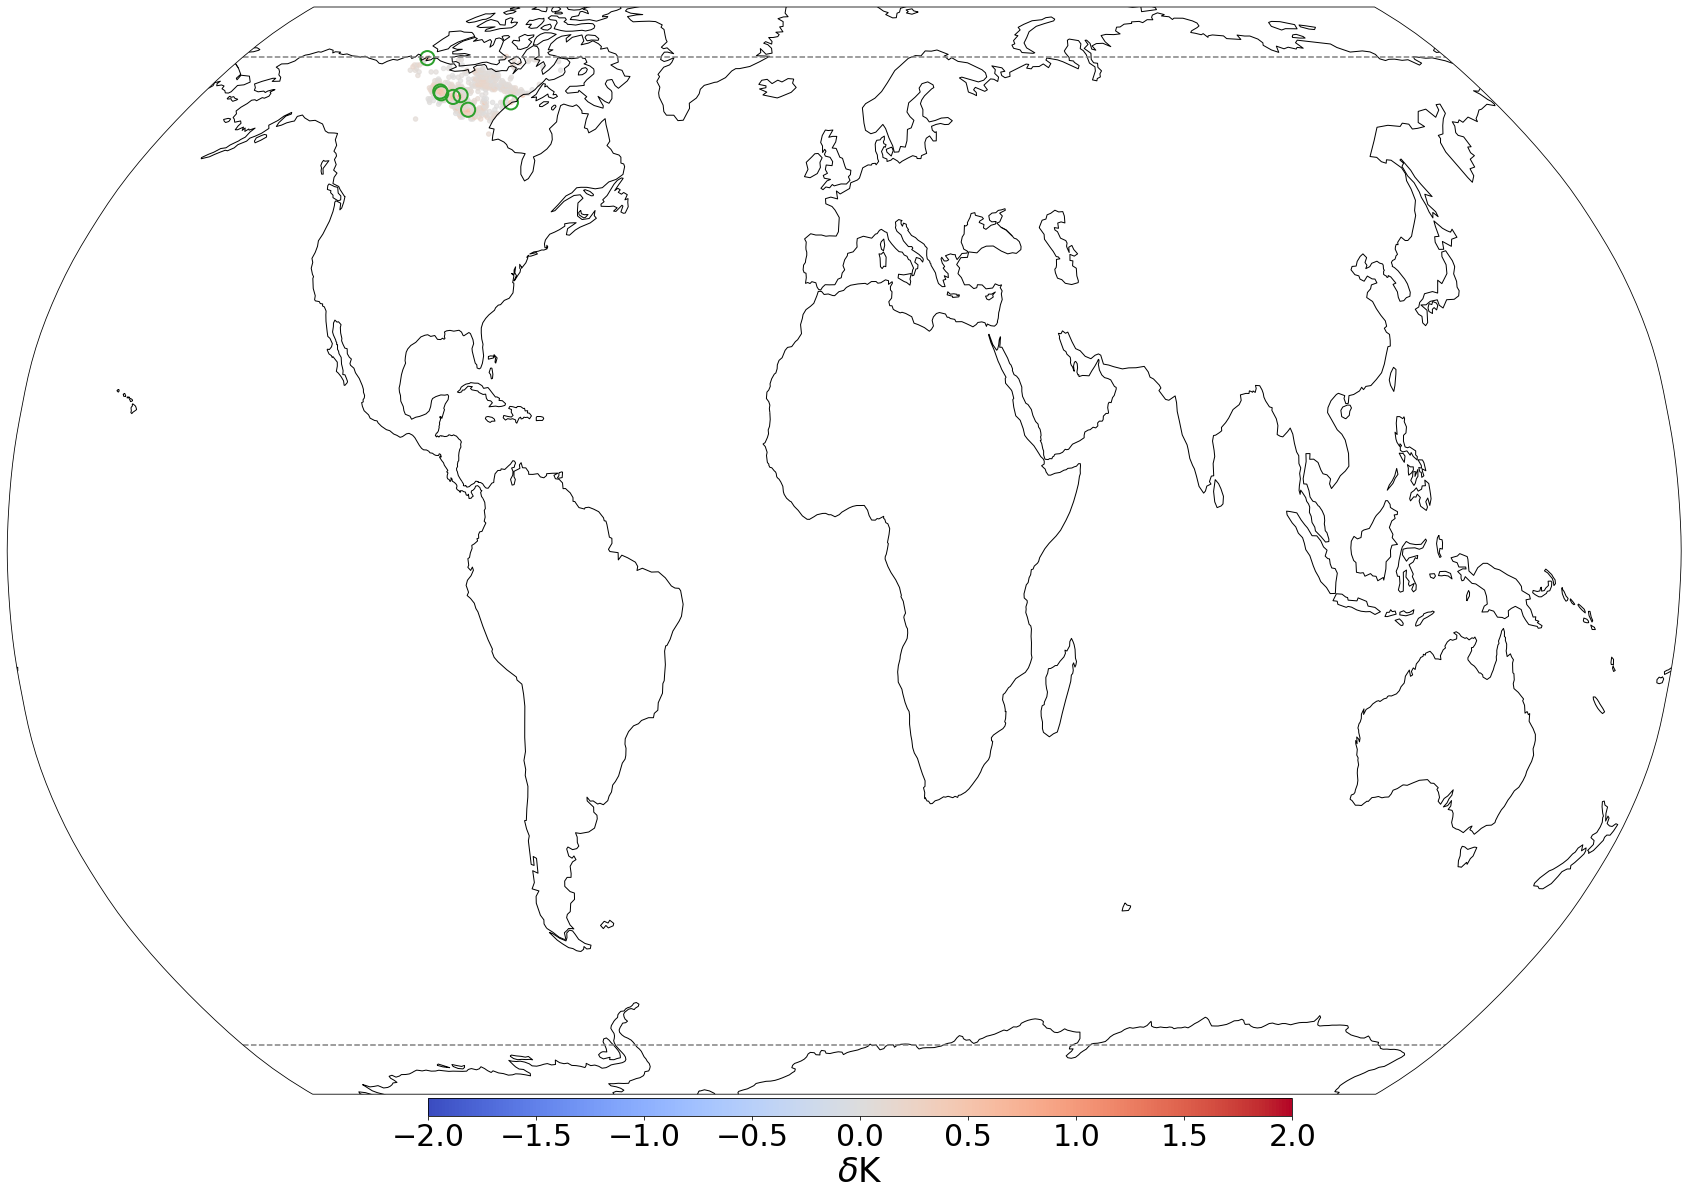

In [119]:
# Northern Canada - bad points
df_lake_canada_bad = df_lake.query('delta > 0 & 50.0 < latitude_ERA & -130 < longitude_ERA < -80')
RobinsonPlot(df_lake_canada_bad,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake_canada_bad.delta.mean())
display(df_lake.sort_values(by=['delta'],ascending=False).iloc[3])


-0.10772805

latitude_ERA                      -28.24355
longitude_ERA                      137.1875
MODIS_LST                        313.954041
V15_prediction                   294.568146
V20_prediction                   312.078827
V20X_prediction                  309.996826
V15_error                         19.385876
V20_error                          4.199694
V20X_error                         5.027334
delta                            -15.186182
deltaX                           -14.358541
latitude_join                       -28.244
longitude_join                      137.188
latitude_ERA_y                    -28.24355
longitude_ERA_y                    137.1875
V15_clFr                           0.998833
V15_cvhFr                               0.0
V15_cvlFr                               0.0
V15_dl                              4.69043
V15_oceanFr                             0.0
V15_si10Fr                              0.0
V15_z                           -158.472778
V20_clFr                        

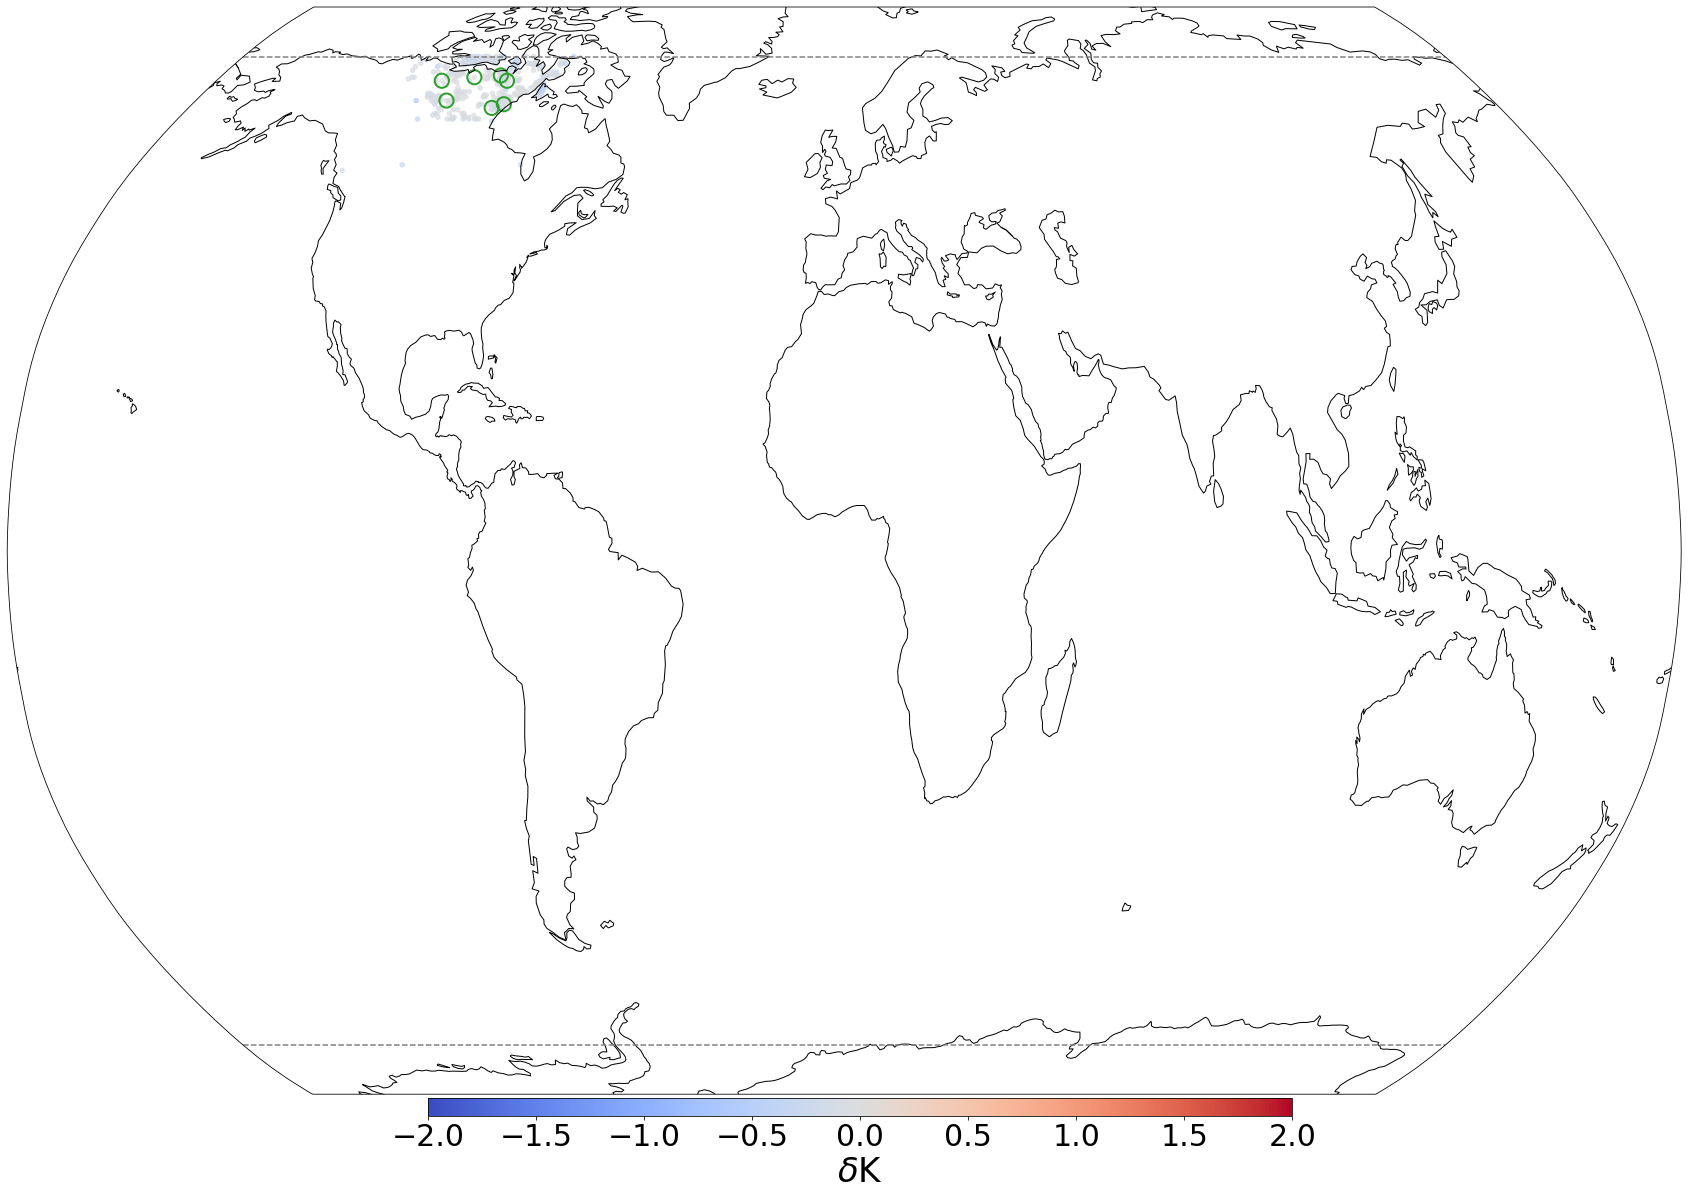

In [115]:
# Northern Canada - good points
df_lake_canada_good = df_lake.query('delta < 0 & 50.0 < latitude_ERA & -130 < longitude_ERA < -80')
RobinsonPlot(df_lake_canada_good,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)
display(df_lake_canada_good.delta.mean())
display(df_lake.sort_values(by=['delta'],ascending=True).iloc[0])


In [130]:
import seaborn as sns


df_lake_canada_good['change_in_cl'] = df_lake_canada_good['V15_clFr'] - df_lake_canada_good['V20_clFr']
df_lake_canada_good['change_in_cvl'] = df_lake_canada_good['V15_cvlFr'] - df_lake_canada_good['V20_cvlFr']
df_lake_canada_good['change_in_cvh'] = df_lake_canada_good['V15_cvhFr'] - df_lake_canada_good['V20_cvhFr']

df_lake_canada_bad['change_in_cl'] = df_lake_canada_bad['V15_clFr'] - df_lake_canada_bad['V20_clFr']
df_lake_canada_bad['change_in_cvl'] = df_lake_canada_bad['V15_cvlFr'] - df_lake_canada_bad['V20_cvlFr']
df_lake_canada_bad['change_in_cvh'] = df_lake_canada_bad['V15_cvhFr'] - df_lake_canada_bad['V20_cvhFr']





/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

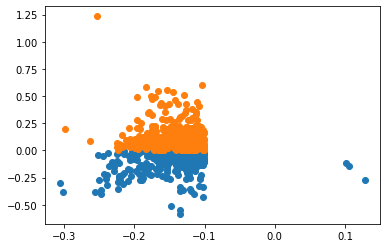

In [133]:

plt.plot()
plt.scatter(df_lake_canada_good['change_in_cl'],df_lake_canada_good['delta'])
plt.scatter(df_lake_canada_bad['change_in_cl'],df_lake_canada_bad['delta'])




#sns.scatterplot(df_lake_canada_good,'change_in_cl','change_in_cl')


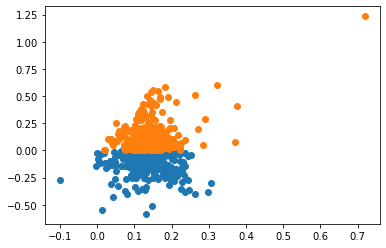

In [134]:
plt.plot()
plt.scatter(df_lake_canada_good['change_in_cvl'],df_lake_canada_good['delta'])
plt.scatter(df_lake_canada_bad['change_in_cvl'],df_lake_canada_bad['delta'])


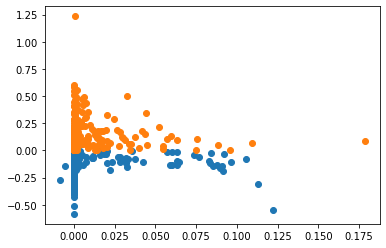

In [135]:
plt.plot()
plt.scatter(df_lake_canada_good['change_in_cvh'],df_lake_canada_good['delta'])
plt.scatter(df_lake_canada_bad['change_in_cvh'],df_lake_canada_bad['delta'])


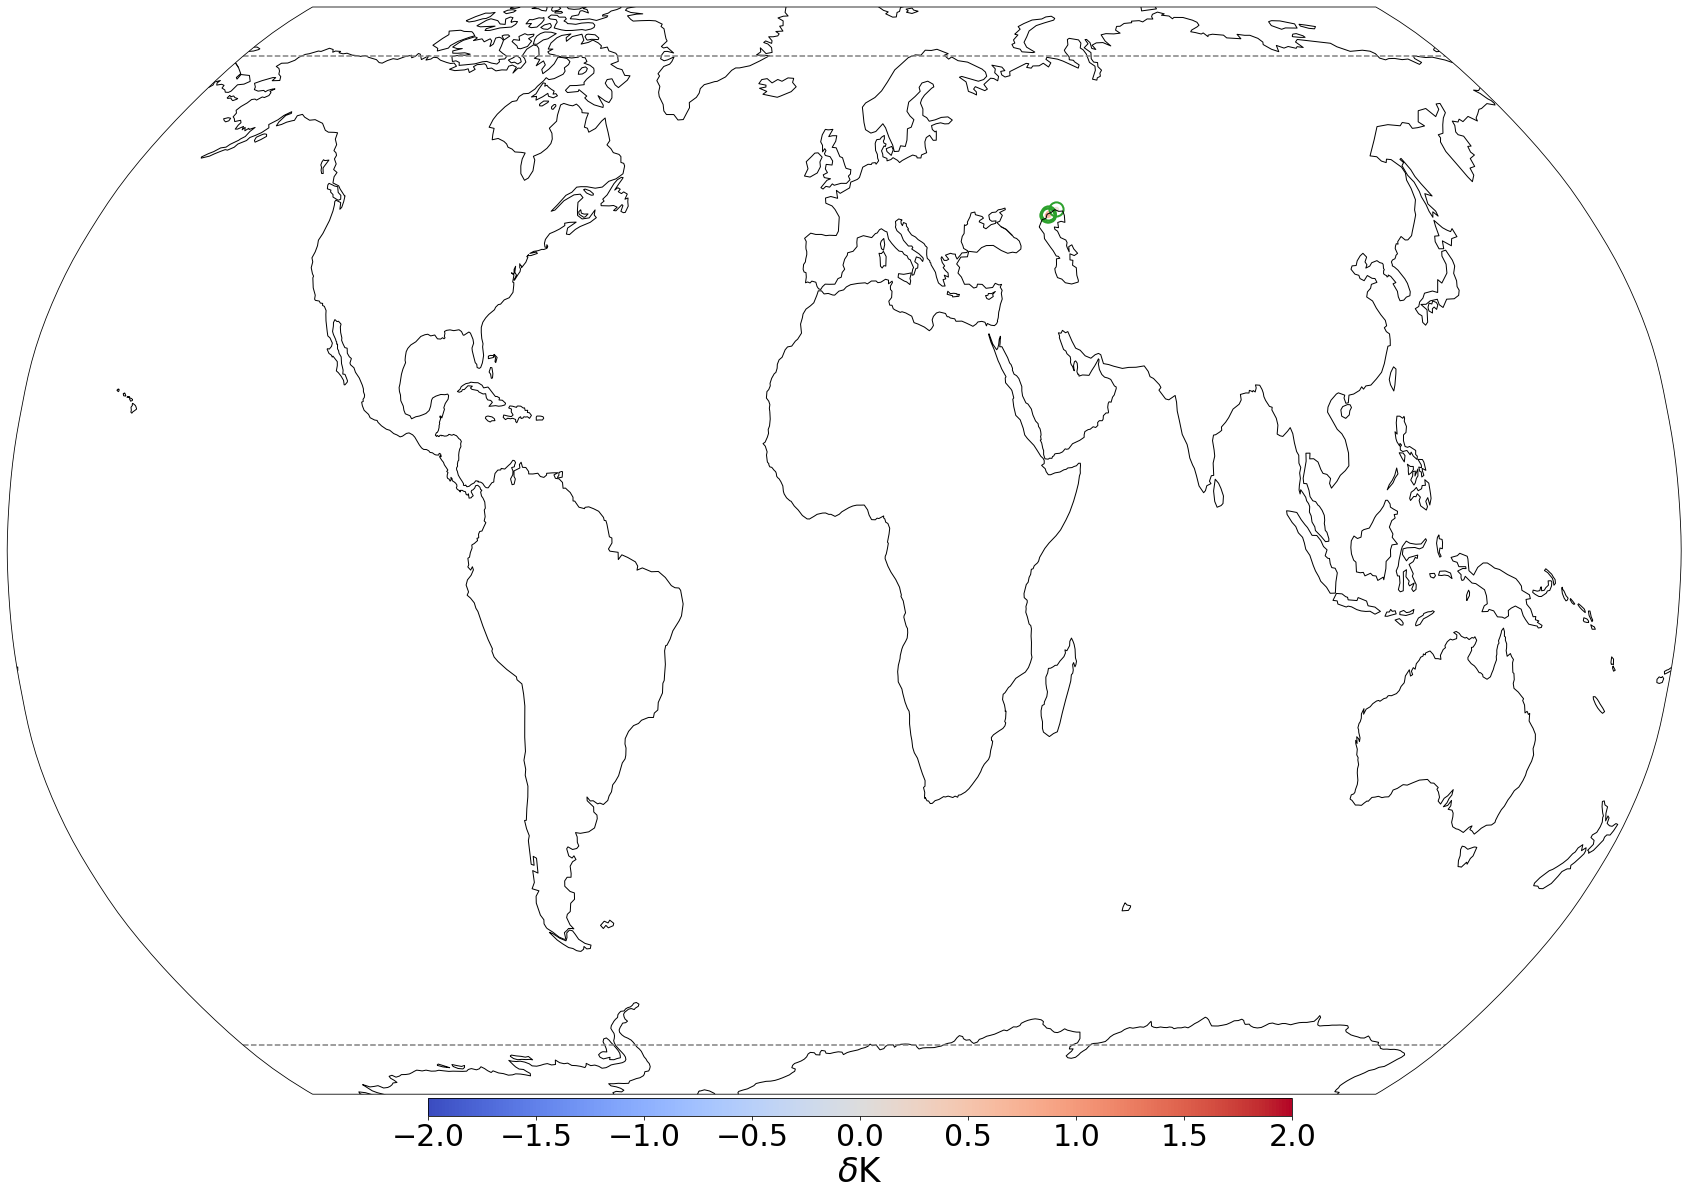

In [19]:
# Edge of Caspian sea

df_lake_bad = df_lake.query('delta > 0.0 &   46 < latitude_ERA < 54 & 43 < longitude_ERA < 53')
RobinsonPlot(df_lake_bad,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)

In [23]:
for i in range(4):
    print(df_lake_bad.latitude_ERA.to_numpy()[i],df_lake_bad.longitude_ERA.to_numpy()[i])

46.22948997297545 49.125
46.22948997297545 49.5
46.51052023808231 49.5
47.072580762649004 51.599999999999994


In [16]:
df_lake_bad.delta.mean()
len(df_lake_bad) #.delta.mean()

4

In [19]:
display(df_lake_bad.sort_values(by=['delta'],ascending=False).iloc[2])


latitude_ERA                       46.22949
longitude_ERA                          49.5
MODIS_LST                        290.328278
V15_prediction                   289.946136
V20_prediction                   292.233826
V20X_prediction                  292.965637
V15_error                          2.069937
V20_error                          2.555157
V20X_error                         3.162007
delta                              0.485221
deltaX                              1.09207
latitude_join                        46.229
longitude_join                         49.5
latitude_ERA_y                     46.22949
longitude_ERA_y                        49.5
V15_clFr                           0.812793
V15_cvhFr                               0.0
V15_cvlFr                               0.0
V15_dl                            21.519531
V15_oceanFr                             0.0
V15_si10Fr                              0.0
V15_z                           -245.339966
V20_clFr                        

In [143]:
df_lake_bad['change_in_cl'] = df_lake_bad['V15_clFr'] - df_lake_bad['V20_clFr']
df_lake_bad['change_in_cvl'] = df_lake_bad['V15_cvlFr'] - df_lake_bad['V20_cvlFr']
df_lake_bad['change_in_cvh'] = df_lake_bad['V15_cvhFr'] - df_lake_bad['V20_cvhFr']


/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/k/kimpson/bin/conda/envs/workhorse/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFram

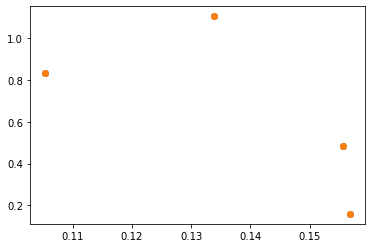

In [144]:

plt.plot()
plt.scatter(df_lake_bad['change_in_cl'],df_lake_bad['delta'])
plt.scatter(df_lake_bad['change_in_cl'],df_lake_bad['delta'])




#sns.scatterplot(df_lake_canada_good,'change_in_cl','change_in_cl')


---

# Vegetation deep dive

In [30]:
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
#26 is Siberut
i = 25
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[i])
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[i]['latitude_ERA'])
display(df_veg.sort_values(by=['delta'],ascending=False).iloc[i]['longitude_ERA'])


latitude_ERA  longitude_ERA     delta
30656      -8.852456     120.656250  4.530539
105108     43.419187      -4.125000  3.734607
86233      32.459005      34.880000  3.441413
54269      11.662760     102.937500  3.095105
3462      -42.576096     171.111111  2.250091

latitude_ERA                      -44.262278
longitude_ERA                        -72.375
MODIS_LST                         283.093933
V15_prediction                    281.501343
V20_prediction                    280.709656
V20X_prediction                   280.545135
V15_error                           2.939637
V20_error                           3.604369
V20X_error                          3.382755
delta                               0.664732
deltaX                              0.443118
latitude_join                        -44.262
longitude_join                       -72.375
latitude_ERA_y                    -44.262278
longitude_ERA_y                      -72.375
V15_clFr                            0.018735
V15_cvhFr                            0.66333
V15_cvlFr                           0.127156
V15_dl                             46.320312
V15_oceanFr                              0.0
V15_si10Fr                               0.0
V15_z                            8332.601562
V20_clFr  

-44.26227806789189

-72.375

In [37]:
    
def classify(x):
    
    if x ==0.0:
        return True
    else:
        return False











df_tmp = df_veg.copy()
df_tmp['change_in_cvh'] = df_tmp['V15_cvhFr'] - df_tmp['V20_cvhFr']
df_tmp['zeroed'] = df_tmp.apply(lambda x : classify(x['V20_cvhFr']), axis = 1)


df_big_changes = df_tmp.query('zeroed & change_in_cvh > 0.2 & delta > 0.0')






# dfbig = df_veg.query('V20_cvhFr == 0')
# #What is the most improved point?
# # 2= mount hudson
# # 4 = not bad
# i = 3
# display(dfbig.sort_values(by=['delta'],ascending=True).iloc[0:10])
# display(dfbig.sort_values(by=['delta'],ascending=True).iloc[i])
# display(dfbig.sort_values(by=['delta'],ascending=True).iloc[i]['latitude_ERA'])
# display(dfbig.sort_values(by=['delta'],ascending=True).iloc[i]['longitude_ERA'])


In [38]:
df_big_changes

latitude_ERA  longitude_ERA   MODIS_LST  V15_prediction  \
3462      -42.576096     171.111111  288.086853      287.794647   
4389      -37.798581     148.666667  293.302094      291.597290   
30656      -8.852456     120.656250  302.146973      303.665344   
40086      -0.983606      98.718750  299.748657      300.371857   
40806      -0.421546     132.187500  300.560242      299.074493   
42655       1.264637     121.218750  301.398285      303.882080   
42929       1.545667     110.812500  302.889343      303.528442   
44372       2.950819     112.218750  302.328308      302.090515   
54269      11.662760     102.937500  302.128815      301.968170   
69456      22.903974     -83.400000  301.756317      302.298553   
86233      32.459005      34.880000  303.553070      304.011200   
89829      34.426218     131.333333  291.155426      292.059692   
95204      37.517551     138.666667  292.633148      292.798462   
105108     43.419187      -4.125000  292.058167      292.267761   
135352     60.843060    -115.555556  272.399689      273.122803   
140986     64.215421      23.750000  278.907043      278.063141   

        V20_prediction  V20X_prediction  V15_error  V20_error  V20X_error  \
3462        284.540283       289.021027   1.614823   3.864914    2.116522   
4389        290.628723       295.876862   2.612243   3.703357    3.519199   
30656       295.032349       302.528961   2.615489   7.146029    2.563355   
40086       298.447510       302.931030   2.413841   3.045062    3.515646   
40806       297.843964       302.320099   2.499310   3.338723    2.368158   
42655       298.184357       304.747864   2.681251   3.611067    3.606318   
42929       298.831879       302.711517   2.126433   4.320683    2.144696   
44372       299.429535       303.599152   2.508236   3.604046    2.337090   
54269       297.504211       300.391266   1.907627   5.002732    2.869315   
69456       298.522980       303.202606   1.802867   3.552877    2.229143   
86233       297.917694       302.476257   2.558999   6.000412    3.339694   
89829       289.458496       293.265594   1.849389   2.705112    2.523609   
95204       290.645386       293.056213   2.988254   4.033684    2.857561   
105108      286.697540       294.884979   1.977671   5.712278    3.197525   
135352      269.225403       274.817474   2.622604   3.888337    3.386105   
140986      276.174255       281.505157   2.685201   3.722354    3.488012   

           delta  ...  clFr_change_is_significant  \
3462    2.250091  ...                       False   
4389    1.091114  ...                       False   
30656   4.530539  ...                       False   
40086   0.631222  ...                       False   
40806   0.839414  ...                       False   
42655   0.929816  ...                       False   
42929   2.194250  ...                       False   
44372   1.095809  ...                       False   
54269   3.095105  ...                       False   
69456   1.750010  ...                       False   
86233   3.441413  ...                       False   
89829   0.855723  ...                       False   
95204   1.045430  ...                       False   
105108  3.734607  ...                       False   
135352  1.265734  ...                       False   
140986  1.037153  ...                       False   

        cvhFr_change_is_significant  cvlFr_change_is_significant  \
3462                           True                        False   
4389                           True                        False   
30656                          True                        False   
40086                          True                        False   
40806                          True                        False   
42655                          True                        False   
42929                          True                         True   
44372                          True                        False   
54269                          True         

In [39]:
i = 0
display(df_big_changes.sort_values(by=['delta'],ascending=False).iloc[i])
display(df_big_changes.sort_values(by=['delta'],ascending=False).iloc[i]['latitude_ERA'])
display(df_big_changes.sort_values(by=['delta'],ascending=False).iloc[i]['longitude_ERA'])

latitude_ERA                       -8.852456
longitude_ERA                      120.65625
MODIS_LST                         302.146973
V15_prediction                    303.665344
V20_prediction                    295.032349
V20X_prediction                   302.528961
V15_error                           2.615489
V20_error                           7.146029
V20X_error                          2.563355
delta                               4.530539
deltaX                             -0.052135
latitude_join                         -8.852
longitude_join                       120.656
latitude_ERA_y                     -8.852456
longitude_ERA_y                    120.65625
V15_clFr                                 0.0
V15_cvhFr                           0.265415
V15_cvlFr                           0.053218
V15_dl                                  25.0
V15_oceanFr                         0.498842
V15_si10Fr                               0.0
V15_z                            3218.496094
V20_clFr  

-8.852456297387976

120.65625

In [58]:



    
def classify(x):
    
    if x ==0.0:
        return True
    else:
        return False
    
df_tmp = df_veg.copy()
df_tmp['change_in_cvh'] = df_tmp['V15_cvhFr'] - df_tmp['V20_cvhFr']
df_tmp['zeroed'] = df_tmp.apply(lambda x : classify(x['V20_cvhFr']), axis = 1)

In [77]:
import seaborn as sns
def plot_scatter(df,savefig):

    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(h,w))

    p = sns.scatterplot(data=df, x="delta", y='change_in_cvh',hue='zeroed',ax=ax1,markers=True,legend=None)

    #ax1.set_xlabel("Month",fontsize=34)
    #ax1.set_ylabel("Mean Prediction Error (K)",fontsize=34)
    #ax1.legend().set_title(None)
    
    #ax1.tick_params(labelsize=30)
    #cax.set_xlabel(r'$\delta$K',fontsize=34)
    ax1.axhline(0.0,c='0.5', linestyle = '--')
    ax1.axvline(0.0,c='0.5', linestyle = '--')

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    


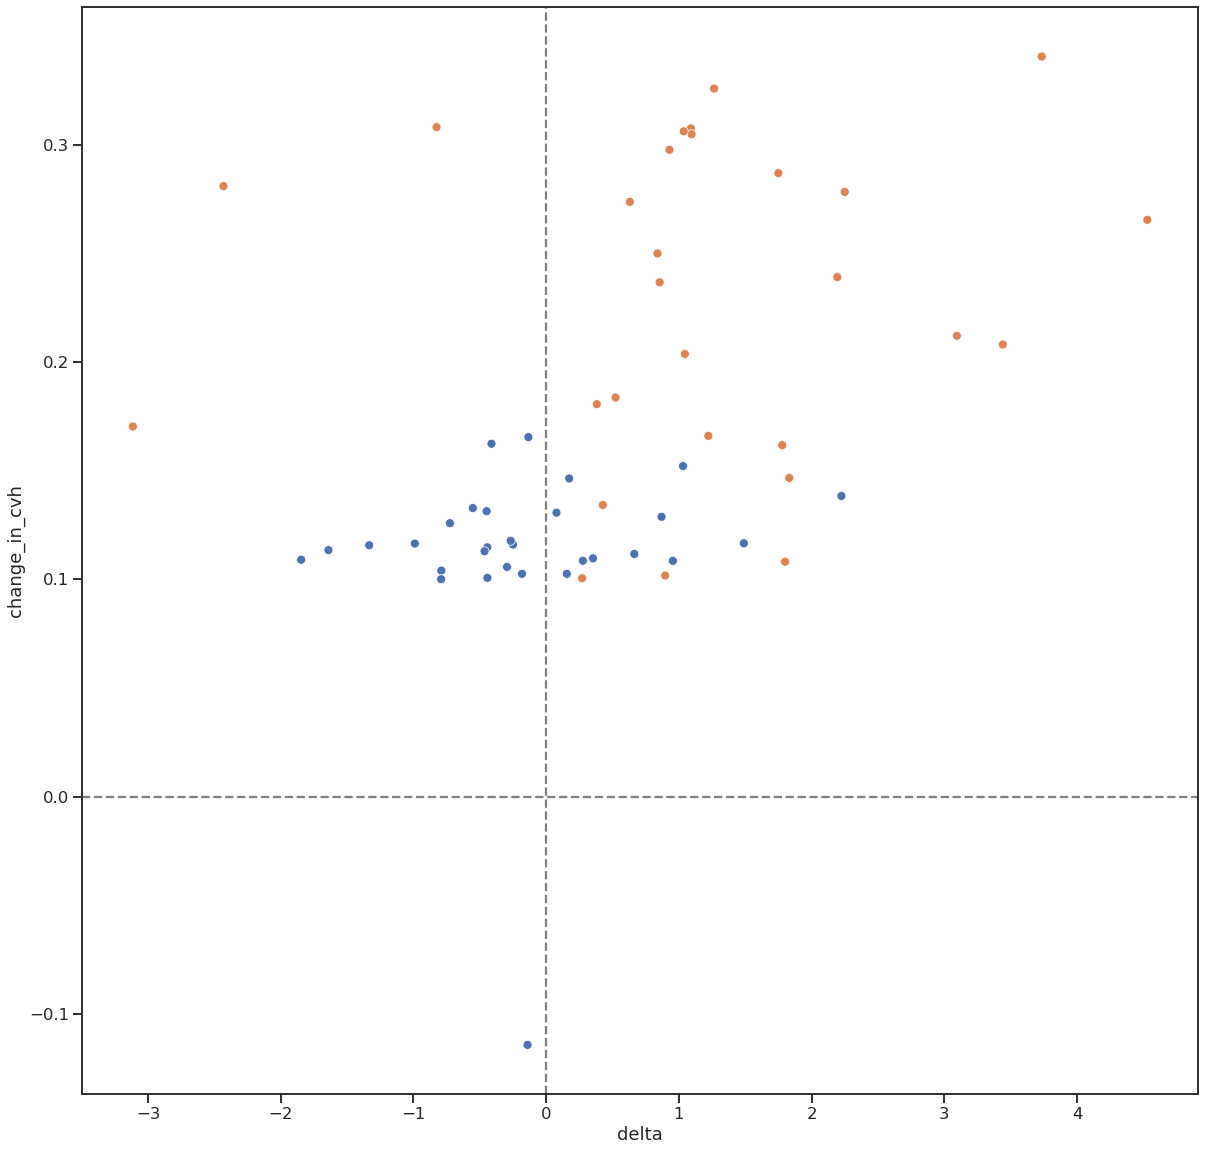

In [78]:
plot_scatter(df_tmp,savefig=None)

# ICE DEEP DIVE

In [26]:
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])
#i=4 is ok, but not great
#i=5 is ok
i=5
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[i])
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[i]['latitude_ERA'])
display(df_ice.sort_values(by=['delta'],ascending=False).iloc[i]['longitude_ERA'])

latitude_ERA  longitude_ERA     delta
2328     -54.098337     -36.900000  3.715223
2174     -63.934391     -58.200000  3.533224
1903     -66.744690     109.333333  2.966166
2214     -61.967180     -57.937500  2.895869
6228     -33.021066     -70.080000  2.674545
2797     -47.634641     -72.400000  2.482121
2272     -54.660397     -69.375000  2.445374
6590     -32.459005     -70.080000  2.428473
92084     35.831369      75.333333  2.293386
2695     -48.758762     -73.200000  2.225029

latitude_ERA                       -47.634641
longitude_ERA                           -72.4
MODIS_LST                          280.414215
V15_prediction                     278.254181
V20_prediction                     274.706421
V20X_prediction                    273.911438
V15X_prediction                    276.300018
V15_error                             3.84649
V20_error                             6.32861
V20X_error                           7.094144
V15X_error                           5.049078
delta                                2.482121
deltaX                               3.247655
deltaX15                             1.202588
latitude_join                         -47.635
longitude_join                          -72.4
latitude_ERA_y                     -47.634641
longitude_ERA_y                    -72.400002
V15_clFr                             0.015907
V15_cvhFr                            0.162744
V15_cvlFr                            0.220761
V15_dl                            

-47.63464127942677

-72.39999999999998

In [27]:
root = '/network/group/aopp/predict/TIP016_PAXTON_RPSPEEDY/ML4L/ECMWF_files/raw/' 
f = f'{root}processed_data/joined_data/2016_MLS.parquet'
training_data = pd.read_parquet(f,columns=['latitude_ERA', 'longitude_ERA','time','number_of_modis_observations'])

In [28]:
num_obs = training_data.groupby(['latitude_ERA','longitude_ERA']).mean().reset_index()

<ipython-input-28-7daa13c726f7>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  num_obs = training_data.groupby(['latitude_ERA','longitude_ERA']).mean().reset_index()


In [29]:
df_ice_num = pd.merge(df_ice,num_obs,how='inner',left_on=['latitude_ERA', 'longitude_ERA'], right_on=['latitude_ERA', 'longitude_ERA']) #inner join.

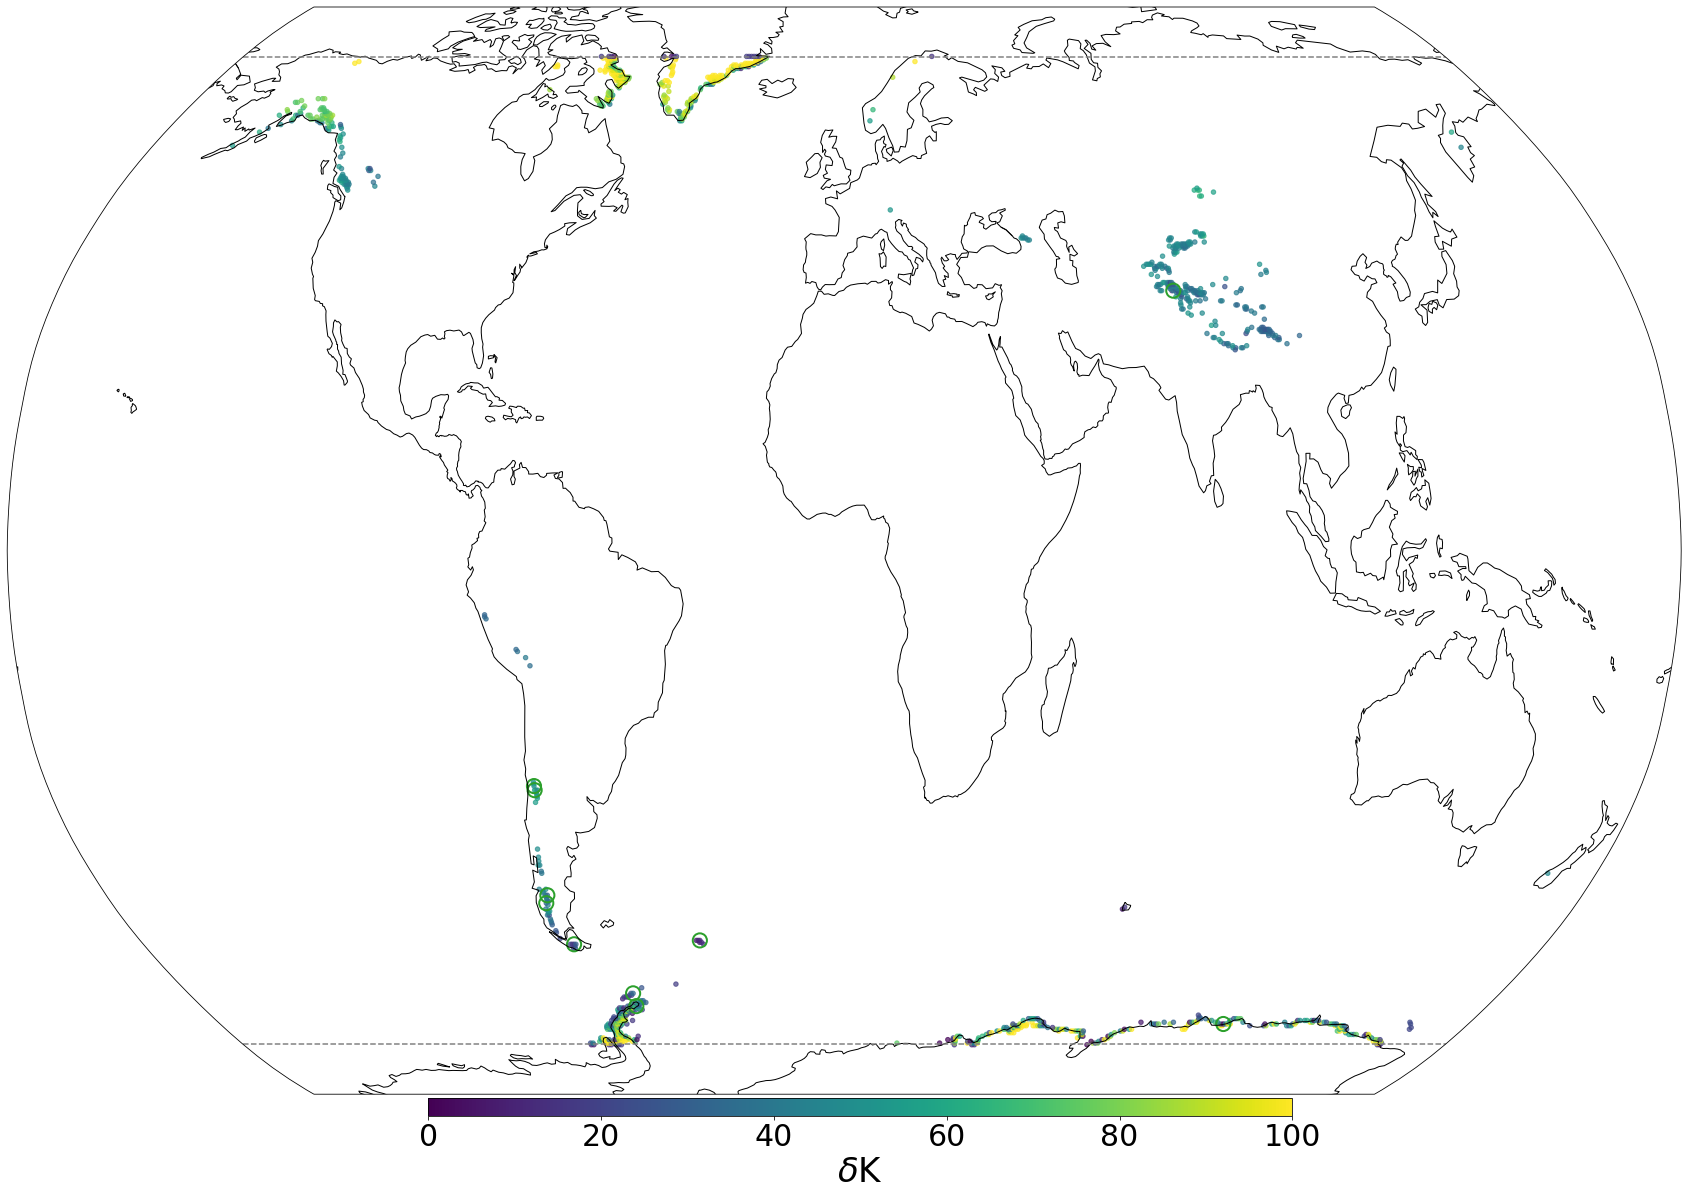

In [30]:
RobinsonPlot(df_ice_num,'number_of_modis_observations',vmin=0,vmax=100,cmap=plt.cm.viridis,markersize = 20,savefig=None,ncircles=n)

In [31]:
north = df_ice_num.query('latitude_ERA > 0')
south = df_ice_num.query(' -55 < latitude_ERA < 0')
many = df_ice_num.query('number_of_modis_observations > 50')
many.delta.mean()

-0.06929106

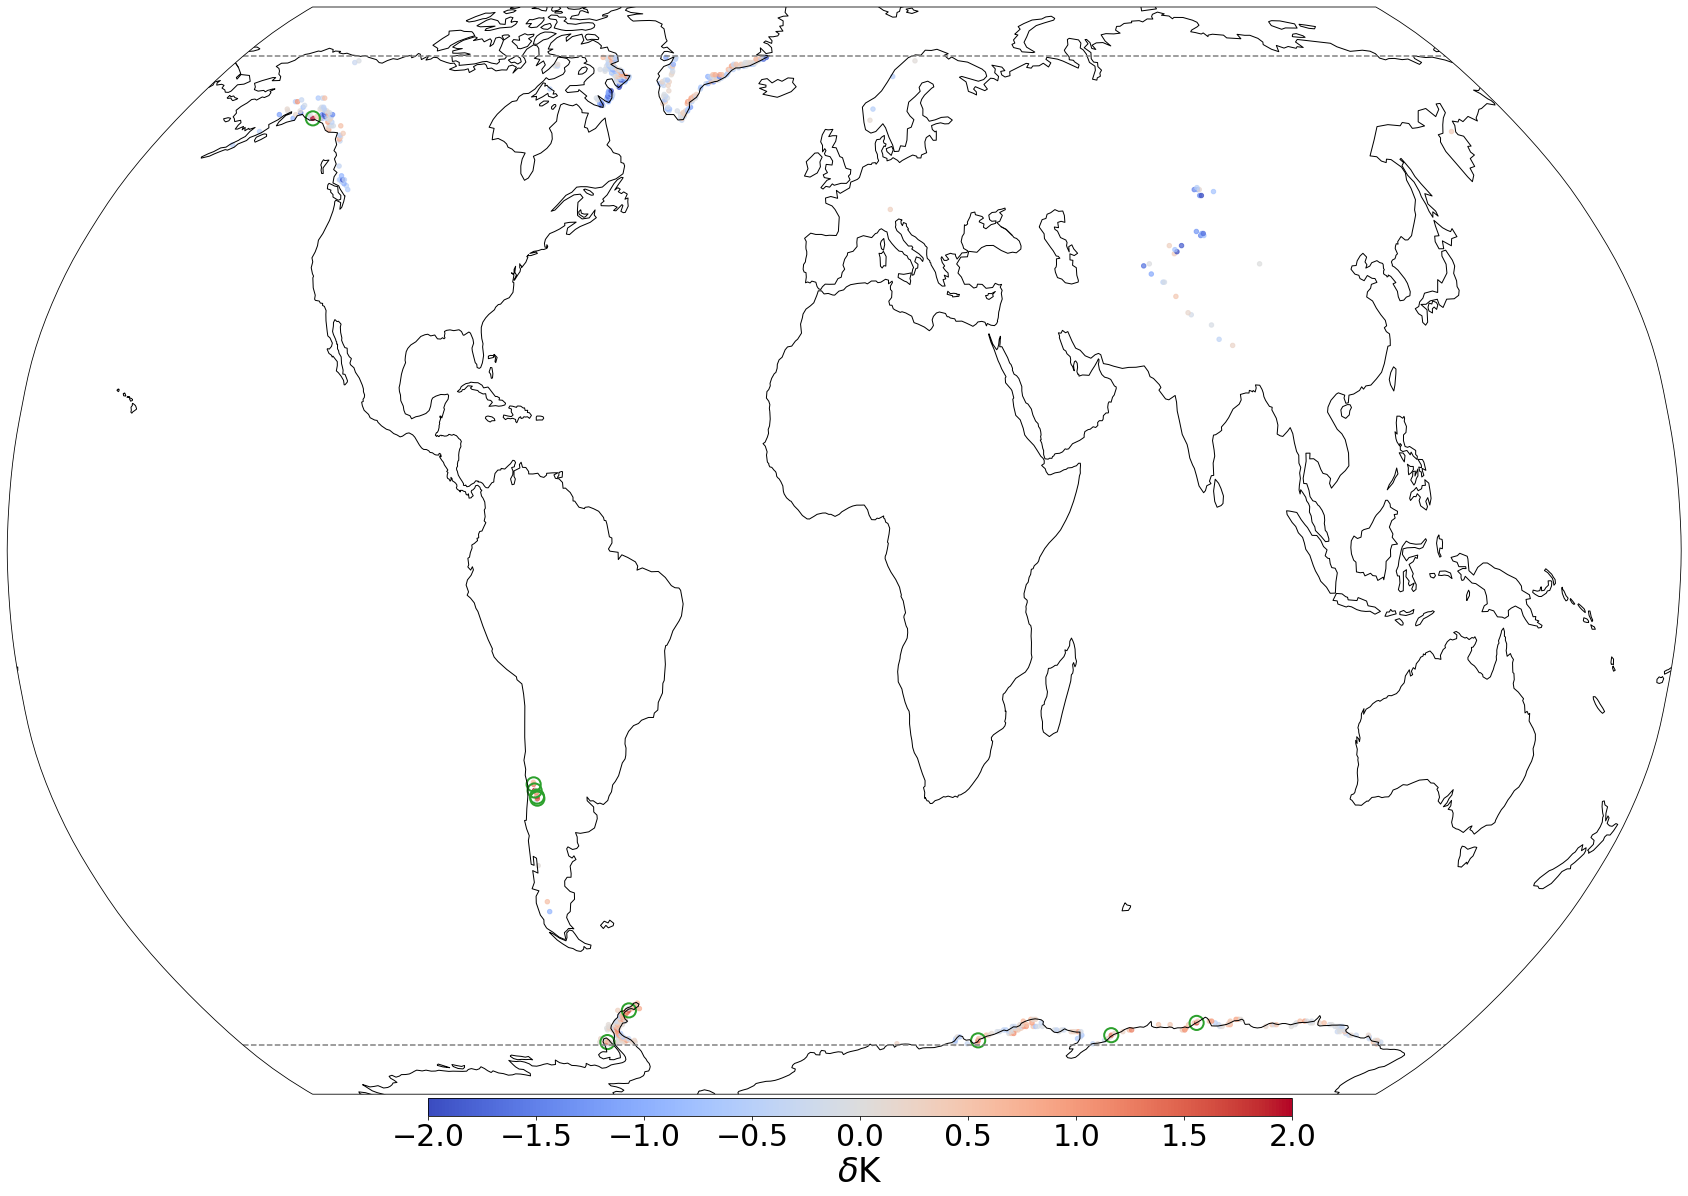

In [32]:
RobinsonPlot(many,'delta',vmin=-2,vmax=+2,cmap=plt.cm.coolwarm,markersize = 20,savefig=None,ncircles=n)

In [35]:
display(many.sort_values(by=['delta'],ascending=False).iloc[0:n][['latitude_ERA','longitude_ERA','delta']])

#i=1 #Bering glacier#
#=0 #juncal glacier
i=0
display(many.sort_values(by=['delta'],ascending=False).iloc[i])
display(many.sort_values(by=['delta'],ascending=False).iloc[i]['latitude_ERA'].to_numpy()[0])
display(many.sort_values(by=['delta'],ascending=False).iloc[i]['longitude_ERA'].to_numpy()[0])

latitude_ERA  longitude_ERA     delta
443    -33.021066     -70.080000  2.674545
768     60.281000    -143.466667  2.156609
440    -33.864157     -69.760000  1.770949
346    -64.496451     -60.625000  1.602544
266    -66.463660     101.333333  1.600019
439    -34.145187     -69.760000  1.565451
67     -69.273959      39.750000  1.434038
34     -69.554988     -70.500000  1.407098
447    -32.177975     -70.080000  1.316627
107    -68.430869      78.480000  1.303456

latitude_ERA                       -33.021066
longitude_ERA                          -70.08
MODIS_LST                          290.502838
V15_prediction                     288.856537
V20_prediction                     284.650482
V20X_prediction                    285.609528
V15X_prediction                    288.613739
V15_error                            3.752489
V20_error                            6.427034
V20X_error                           5.634264
V15X_error                           3.810919
delta                                2.674545
deltaX                               1.881776
deltaX15                             0.058431
latitude_join                         -33.021
longitude_join                         -70.08
latitude_ERA_y                     -33.021066
longitude_ERA_y                    -70.080002
V15_clFr                             0.002379
V15_cvhFr                                 0.0
V15_cvlFr                            0.053761
V15_dl                            

AttributeError: 'numpy.float64' object has no attribute 'to_numpy'

In [23]:
1+1

2

In [145]:
import numpy as np


xx = np.arange(1,100)
yy = []
zz = []
for x in xx:
    
    many = df_ice_num.query(f'number_of_modis_observations >= {x}')
    value = many.delta.mean()
    yy.extend([value])





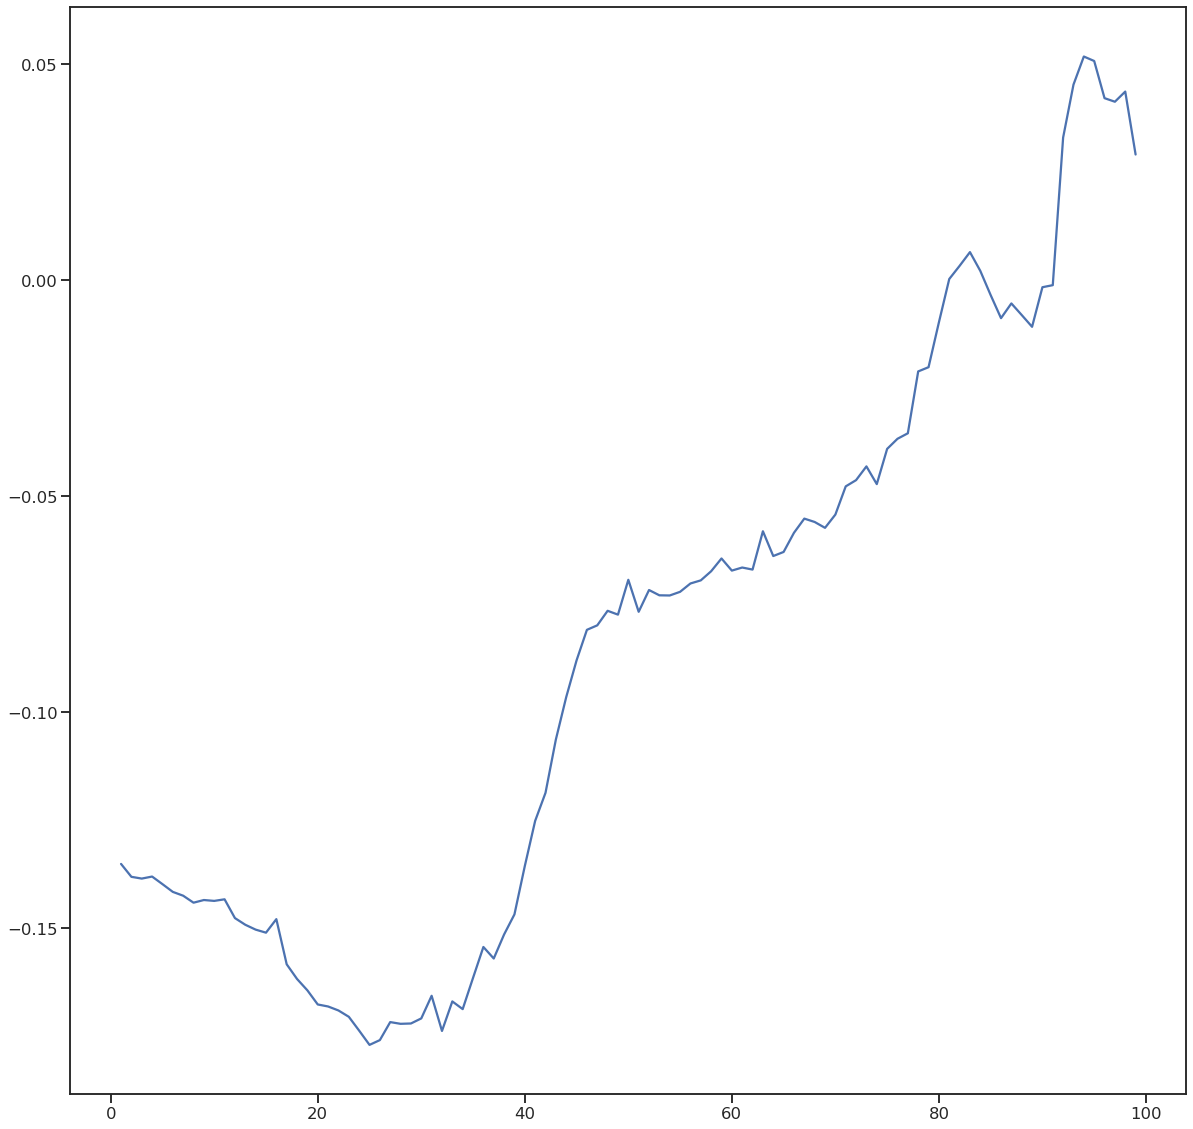

In [147]:
plt.plot(xx,yy)

In [127]:
north.number_of_modis_observations.mean()

63.30581787393726

In [128]:
south.number_of_modis_observations.mean()

36.55912814576236

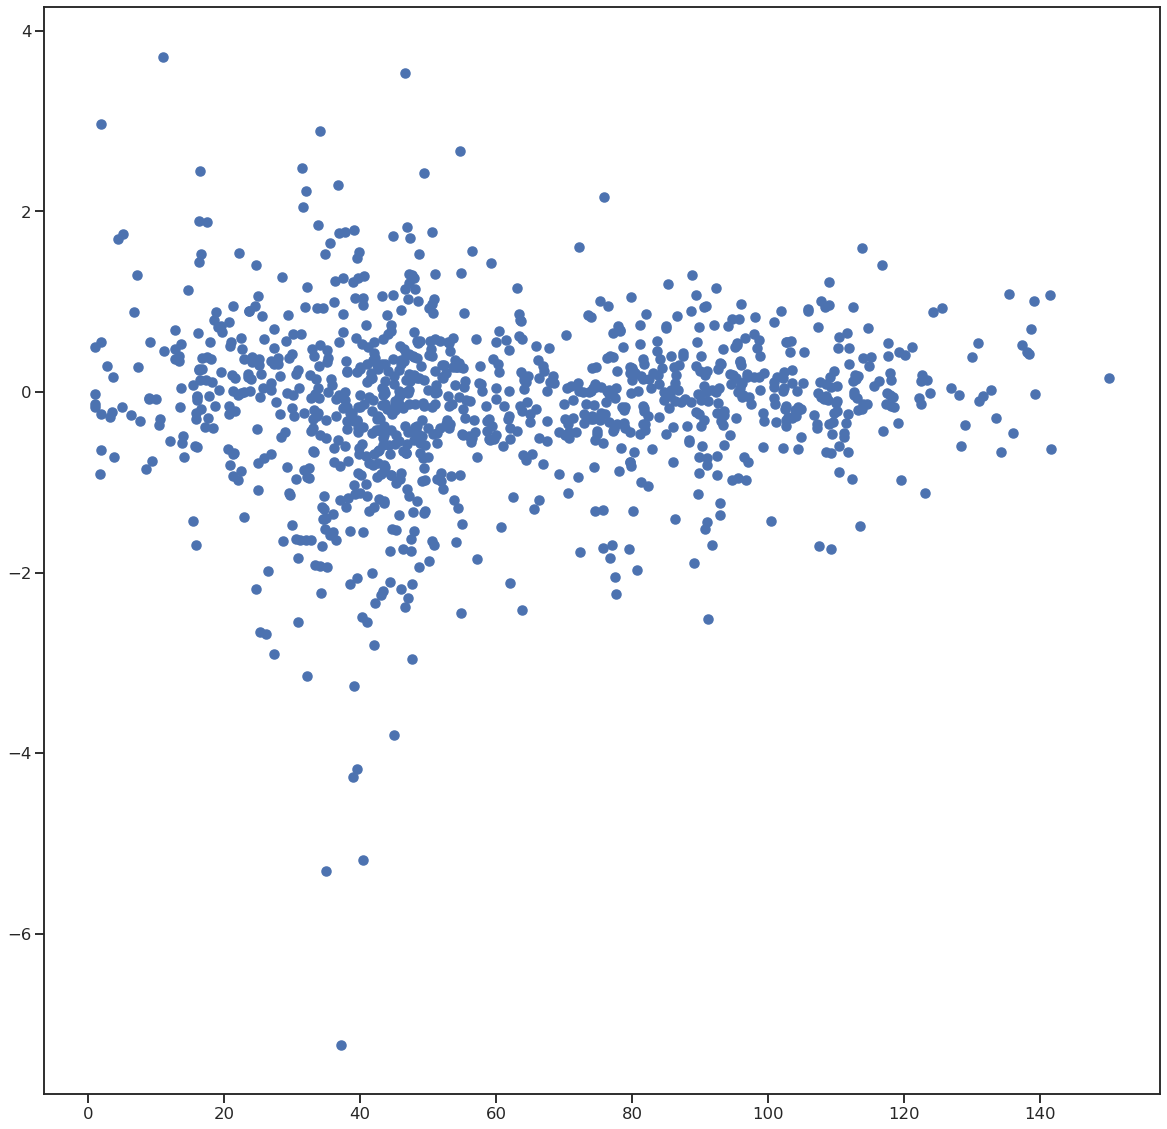

In [129]:
plt.plot()
plt.scatter(df_ice_num['number_of_modis_observations'],df_ice_num['delta'])

In [82]:
# def classify_ice(x):
    
#     if x ==0.0:
#         return True
#     else:
#         return False
    
df_tmp = df_ice.copy()
df_tmp['change_in_si10'] = df_tmp['V15_si10Fr'] - df_tmp['V20_si10Fr']
#df_tmp['zeroed'] = df_tmp.apply(lambda x : classify(x['V20_cvhFr']), axis = 1)

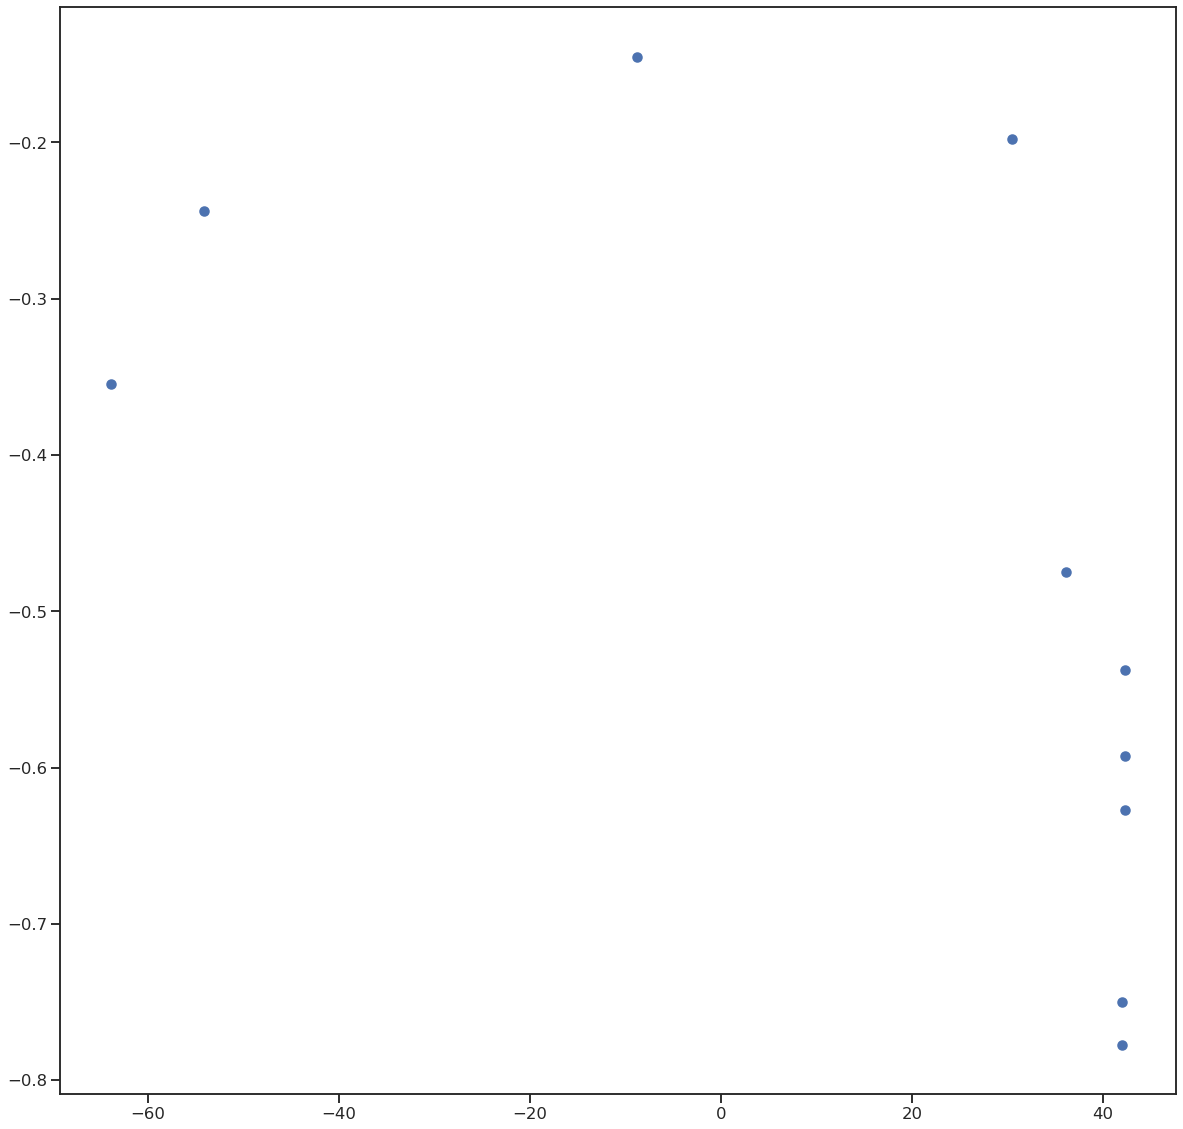

In [89]:
plt.plot()
df_big_changes = df_tmp.query('abs(delta) > 3.0')
plt.scatter(df_big_changes['latitude_ERA'],df_big_changes['change_in_si10'])

In [172]:
df_tmp.query('delta > 0')

latitude_ERA  longitude_ERA   MODIS_LST  V15_prediction  \
2695      -48.758762     -73.200000  275.938141      274.342499   
2722      -48.477732     -72.400000  280.743073      276.963562   
2771      -47.915672     -72.800000  280.819366      276.449768   
2844      -47.072581     -73.200000  278.869751      275.478241   
2968      -45.948460     -72.750000  281.486603      276.321594   
3145      -44.543308     -72.375000  283.120300      281.532990   
3182      -44.262278     -72.375000  283.093933      281.501343   
3300      -43.419187     -72.750000  285.054199      283.603577   
3301      -43.419187     -72.375000  284.455170      282.948608   
3384      -42.857127     -72.375000  284.604584      283.454376   
3462      -42.576096     171.111111  288.086853      287.794647   
4389      -37.798581     148.666667  293.302094      291.597290   
19009     -19.812640      44.437500  307.827637      307.317047   
30656      -8.852456     120.656250  302.146973      303.665344   
40086      -0.983606      98.718750  299.748657      300.371857   
40806      -0.421546     132.187500  300.560242      299.074493   
42655       1.264637     121.218750  301.398285      303.882080   
43812       2.388758     113.906250  300.339294      300.719147   
44099       2.669788     113.906250  300.588013      300.890442   
44101       2.669788     114.468750  299.848206      299.871246   
44372       2.950819     112.218750  302.328308      302.090515   
54269      11.662760     102.937500  302.128815      301.968170   
69456      22.903974     -83.400000  301.756317      302.298553   
86233      32.459005      34.880000  303.553070      304.011200   
89829      34.426218     131.333333  291.155426      292.059692   
95204      37.517551     138.666667  292.633148      292.798462   
96350      38.360642      -7.382812  303.582275      304.448761   
105108     43.419187      -4.125000  292.058167      292.267761   
121361     52.131125     -75.555556  272.655609      272.881805   
134447     60.281000    -115.733333  274.144653      275.444366   
134472     60.281000    -102.400000  267.099213      267.853882   
134925     60.562030    -103.888889  268.243347      268.464813   
135352     60.843060    -115.555556  272.399689      273.122803   
138039     62.529240    -141.750000  273.655884      275.360626   
138055     62.529240    -132.750000  273.284637      273.250610   
140986     64.215421      23.750000  278.907043      278.063141   
144957     66.744690    -150.666667  271.204254      270.628235   
146649     67.868810    -134.640000  265.965637      267.353546   

        V20_prediction  V20X_prediction  V15_error  V20_error  V20X_error  \
2695        271.132843       272.695251   3.900243   6.125271    4.768781   
2722        275.974579       276.507202   4.533771   5.403601    4.890962   
2771        274.500183       275.375183   5.191895   6.681853    6.000568   
2844        274.812042       275.258026   5.396326   5.570516    5.529574   
2968        276.126923       275.884613   5.452771   5.608959    5.833492   
3145        280.855896       280.197449   3.081467   3.358673    3.596339   
3182        280.709656       280.545135   2.939637   3.604369    3.382755   
3300        283.616394       281.539551   2.747488   2.825572    4.230000   
3301        282.415802       283.075500   2.873845   3.227645    2.678993   
3384        281.736816       281.695618   2.319816   3.351455    3.360317   
3462        284.540283       289.021027   1.614823   3.864914    2.116522   
4389        290.628723       295.876862   2.612243   3.703357    3.519199   
19009       303.733734       312.016846   2.603751   4.435813    5.070307   
30656       295.032349       302.528961   2.615489   7.146029    2.563355   
40086       298.447510       302.931030   2.413841   3.045062    3.515646   
40806       297.843964       302.320099   2.499310   3.338723    2.368158   
42655       298.184357       304.747864   2.681251   3.611067    3.606318   
43812   

In [160]:
oddballs2 = df_tmp.query('change_in_cvh > 0 & delta < 0')

In [162]:
oddballs2

latitude_ERA  longitude_ERA   MODIS_LST  V15_prediction  \
2871      -46.791551     -74.000000  281.972321      280.310455   
2903      -46.510520     -73.125000  281.607971      277.800934   
2933      -46.229490     -73.125000  281.318878      277.042725   
2967      -45.948460     -73.125000  282.983215      276.463348   
28804     -10.538638     -48.375000  307.612793      309.795166   
29071     -10.257608     -48.375000  306.953400      309.844208   
29347      -9.976578     -48.375000  306.305511      307.438446   
38575      -2.107728     -54.000000  301.163452      305.968567   
40926      -0.140515     -50.062500  301.993317      305.211395   
44100       2.669788     114.187500  300.676880      300.758148   
50056       8.290396      -2.250000  305.629303      310.054779   
58230      15.035124     107.156250  301.732269      302.262238   
61993      17.845428     105.187500  300.123840      299.577179   
70703      23.466035      95.400000  305.322449      309.283386   
119619     51.288034    -125.000000  274.916382      276.851685   
121360     52.131125     -76.000000  273.093658      274.202606   
122298     52.693186    -119.700000  270.531616      274.435944   
122806     52.974216    -120.150000  271.320343      273.798889   
126718     55.222457    -129.375000  275.711273      277.626587   
132110     58.594819      99.500000  275.581207      276.937866   
132112     58.594819     100.500000  274.068390      275.540161   
132533     58.875849     101.000000  274.190521      275.114288   
132535     58.875849     102.000000  273.599060      274.678589   
132536     58.875849     102.500000  273.504150      274.052429   
134448     60.281000    -115.200000  273.846130      275.110016   
134914     60.562030    -110.000000  271.586945      271.741302   
139025     63.091300    -118.800000  268.981171      270.741486   
144068     66.182630    -148.666667  270.302521      273.220612   
144069     66.182630    -148.000000  270.396240      273.073914   
146245     67.587780    -135.000000  266.243683      267.199158   

        V20_prediction  V20X_prediction  V15_error  V20_error  V20X_error  \
2871        283.305176       281.234039   3.476153   3.100121    3.143933   
2903        278.022461       278.922058   4.557589   4.308261    3.908189   
2933        277.481049       277.165558   4.531434   4.264946    4.449552   
2967        278.338074       277.215973   6.548234   4.908392    5.806119   
28804       308.295227       307.450012   2.847902   2.380540    2.281922   
29071       306.057037       306.550049   3.156718   2.527141    2.407398   
29347       307.050415       306.253418   2.287063   2.169183    2.167042   
38575       299.061493       304.140900   4.809935   2.379063    3.219222   
40926       301.225159       303.448059   3.371482   2.545734    2.275733   
44100       301.021515       299.794800   1.691845   1.689679    1.975064   
50056       306.637939       305.240509   4.540480   2.931823    2.879251   
58230       301.878876       301.275024   1.922382   1.835941    1.954729   
61993       300.017578       298.445221   1.755291   1.715362    2.316886   
70703       306.482208       304.619293   4.178126   2.611602    2.230594   
119619      275.565369       276.267578   3.434399   2.970830    3.027797   
121360      273.112366       272.654602   2.221509   2.187526    2.172172   
122298      273.746399       274.024323   4.590691   3.801194    4.149720   
122806      272.705811       272.673950   3.772585   2.981930    3.060682   
126718      276.842285       277.042053   3.450052   3.268686    3.504941   
132110      276.234589       276.352051   2.417560   2.057523    2.323524   
132112      274.629517       274.342407   3.086393   2.642111    2.692854   
132533      274.684570       274.910065   2.456496   2.159506    2.219505   
132535      273.922302       274.034821   2.511411   2.237976    2.263722   
132536      273.632080       273.775024   2.576063   2.369528    2.351953   
13444